In [131]:
# Воробьев Андрей Вариант 6
# Импорт пакетов
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

## Задание1. Визуальный анализ данных.
Построить визуальное представление для каждого столбца
(признака) в исходном наборе данных. Провести анализ полученных
диаграмм. Примечание: для качественных переменных должны быть
построены столбчатая и круговая диаграммы, для количественных
переменных – гистограмма, оценка плотности распределения и
диаграмма «ящик с усами».sns

In [132]:
data = pd.read_excel('./first_practice_dataframe.xlsx', usecols=('cat13_productType',
                                                                 'cat7_motivesForEmployeesToWorkBetter',
                                                                 'num1_7', 'num2_7', 'num3_7'))

In [133]:
# Убедимся, что все правильно считалось
print(data.shape)
print(data.head(10))
print(data.describe().T)

(1000, 5)
  cat7_motivesForEmployeesToWorkBetter cat13_productType       num1_7  \
0                      Peer motivation              Wood   928.003264   
1    Professional growth opportunities           Plastic   942.683617   
2                      peer motivation                 -   986.827992   
3                          Recognition           Plastic   940.824645   
4                          Recognition             metal   908.794236   
5                Friendly work culture             Metal   872.609360   
6    Professional growth opportunities           Plastic   923.567969   
7                          recognition           Plastic -9999.000000   
8    Professional growth opportunities             Metal   939.357979   
9                      peer motivation           Plastic   905.228980   

       num2_7      num3_7  
0  230.711895    63.10306  
1  -54.555626           -  
2  159.587517  100.871834  
3  451.728967   174.60695  
4  186.329695  425.314903  
5 -189.723934   16

Сразу можно заметить, что не вывелась статистика для столбца num3_7. Скорее всего он имеет не числовой тип.

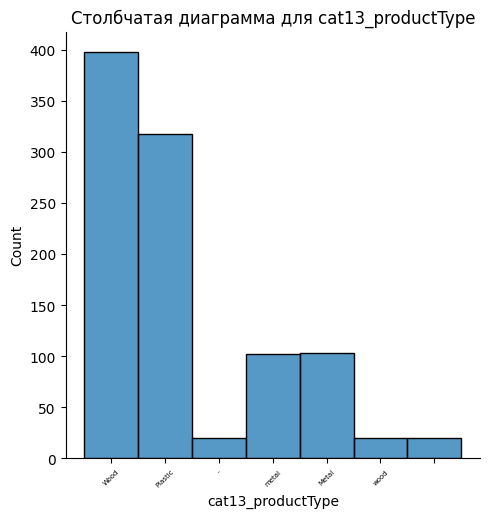

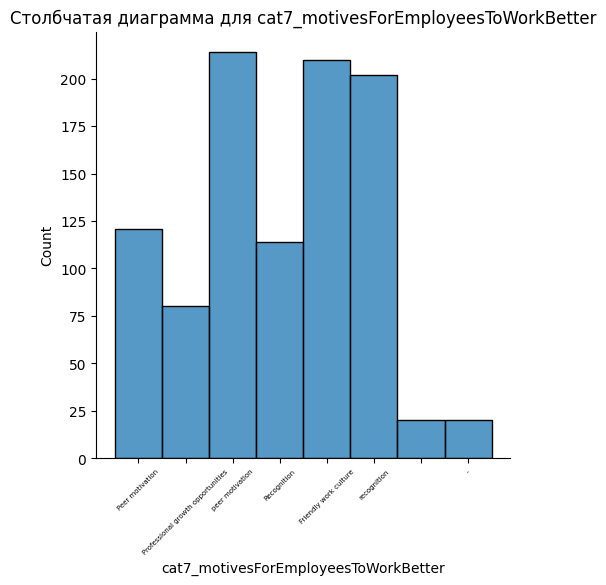

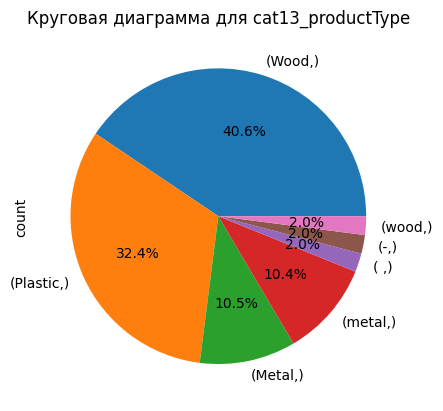

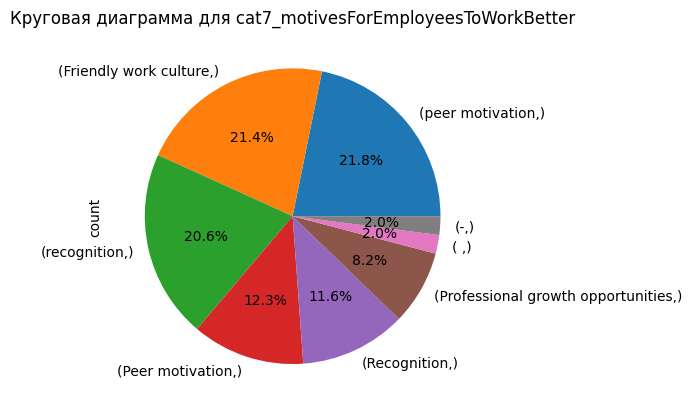

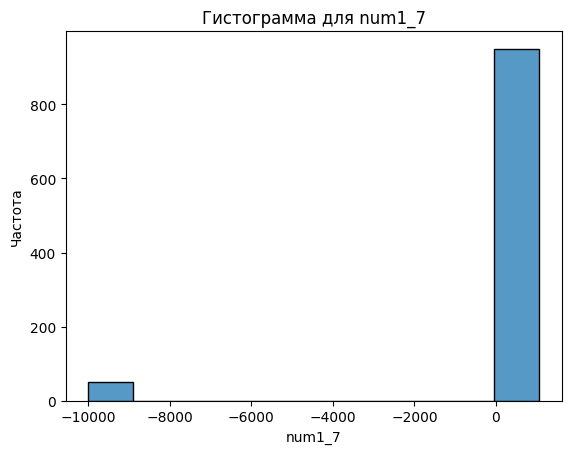

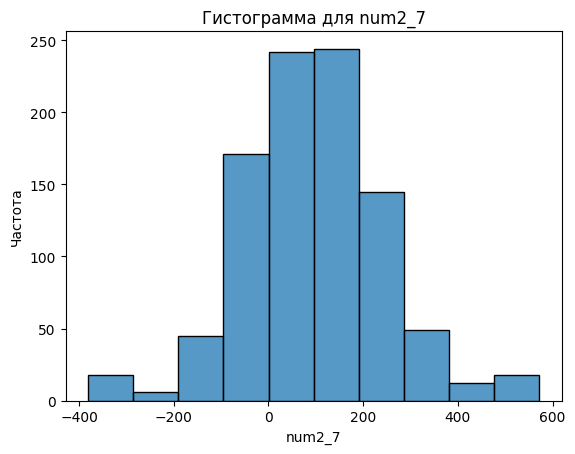

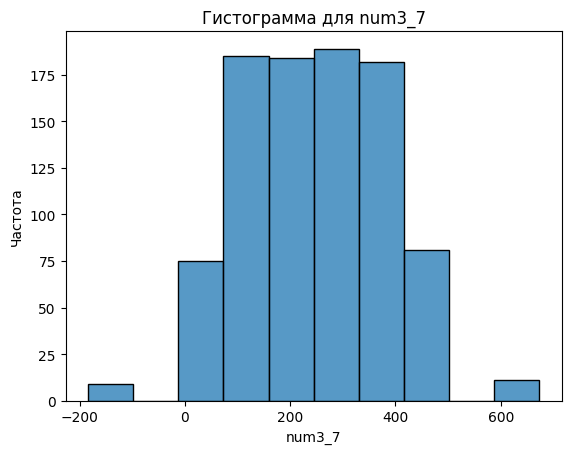

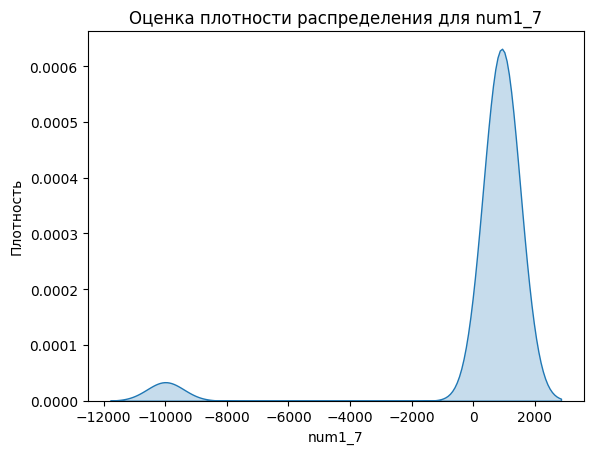

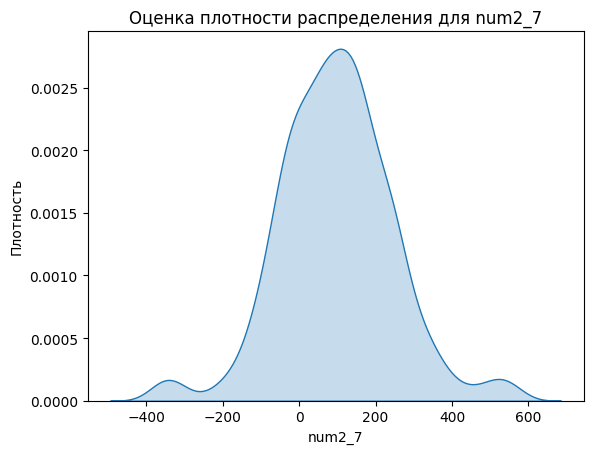

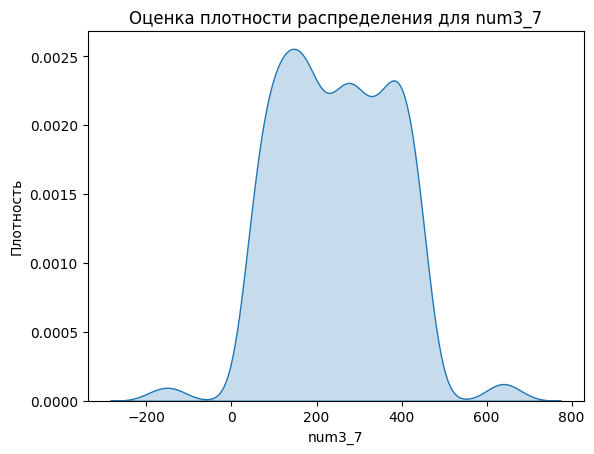

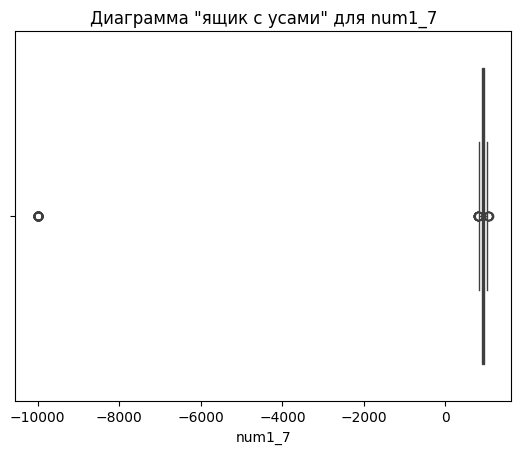

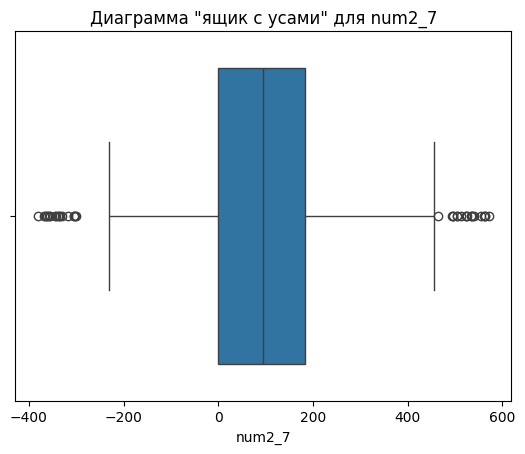

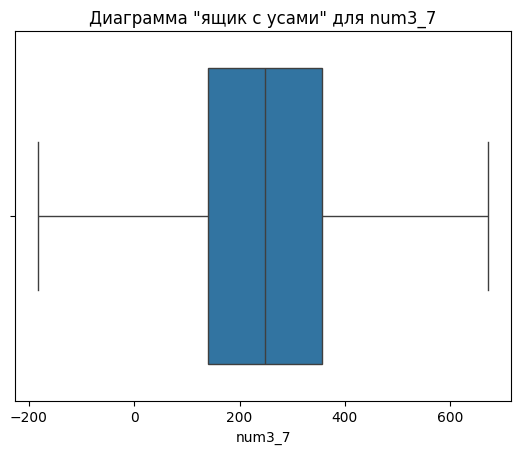

In [134]:
# Напишем функции вывода столбчатой и круговой диаграмм для категориальных переменных

# Предварительно заменим некорректные значения для колочественных переменных на nan

# Столбчатая диаграмма
def construct_histogram(array, data):
    for ar in array:
        sns.displot(data[ar])
        plt.title(f'Столбчатая диаграмма для {ar}')
        plt.xticks(rotation=45, fontsize=5)
        plt.show()

# Круговая
def construct_circle(array, data):
    for ar in array:
        data[[ar]].value_counts().plot.pie(subplots=True, autopct='%1.1f%%')  # Количество для каждого уникально значения (серия)
        plt.title(f'Круговая диаграмма для {ar}')
        plt.show()


# construct_histogram(['cat13_productType', 'cat7_motivesForEmployeesToWorkBetter'], data)
# construct_circle(['cat13_productType', 'cat7_motivesForEmployeesToWorkBetter'], data)

# Функции для вывода гистограммы, оценки плотности распределения и диаграммы «ящик с усами" для количественных переменных

# Гистограмма
def construct_hist(array, data):
    for ar in array:
        data_mas = data.copy()[ar].replace(['-', ' '], np.nan)
        sns.histplot(data_mas, kde=False, bins=10)
        plt.title(f'Гистограмма для {ar}')
        plt.xlabel(ar)
        plt.ylabel('Частота')
        plt.show()

# Оценка плотности
def construct_mark(array, data):
    for ar in array:
        data_mas = data.copy()[ar].replace(['-', ' '], np.nan)
        sns.kdeplot(data_mas, fill=True)
        plt.title(f'Оценка плотности распределения для {ar}')
        plt.xlabel(ar)
        plt.ylabel('Плотность')
        plt.show()

# Ящик с усами
def construct_box(array, data):
    for ar in array:
        data_mas = data.copy().replace(['-', ' '], np.nan)
        sns.boxplot(x=ar, data=data_mas)
        plt.title(f'Диаграмма "ящик с усами" для {ar}')
        plt.xlabel(ar)
        plt.show()


# construct_hist(['num1_7', 'num2_7', 'num3_7'], data)
# construct_mark(['num1_7', 'num2_7', 'num3_7'], data)
# construct_box(['num1_7', 'num2_7', 'num3_7'], data)

# Функция для вызова всех этих функций для каждого столбца
def calls_all_diagrams(data):
    construct_histogram(['cat13_productType', 'cat7_motivesForEmployeesToWorkBetter'], data)
    construct_circle(['cat13_productType', 'cat7_motivesForEmployeesToWorkBetter'], data)
    construct_hist(['num1_7', 'num2_7', 'num3_7'], data)
    construct_mark(['num1_7', 'num2_7', 'num3_7'], data)
    construct_box(['num1_7', 'num2_7', 'num3_7'], data)

calls_all_diagrams(data)

## Задание 2. Провести проверку правдоподобности исходных данных.
Проверка правдоподобности исходных данных должна включать
проверку типов исходных данных, лишних пропусков, невозможных
значений и т.п. Привести найденные значения к нужному форма.ту

<Axes: >

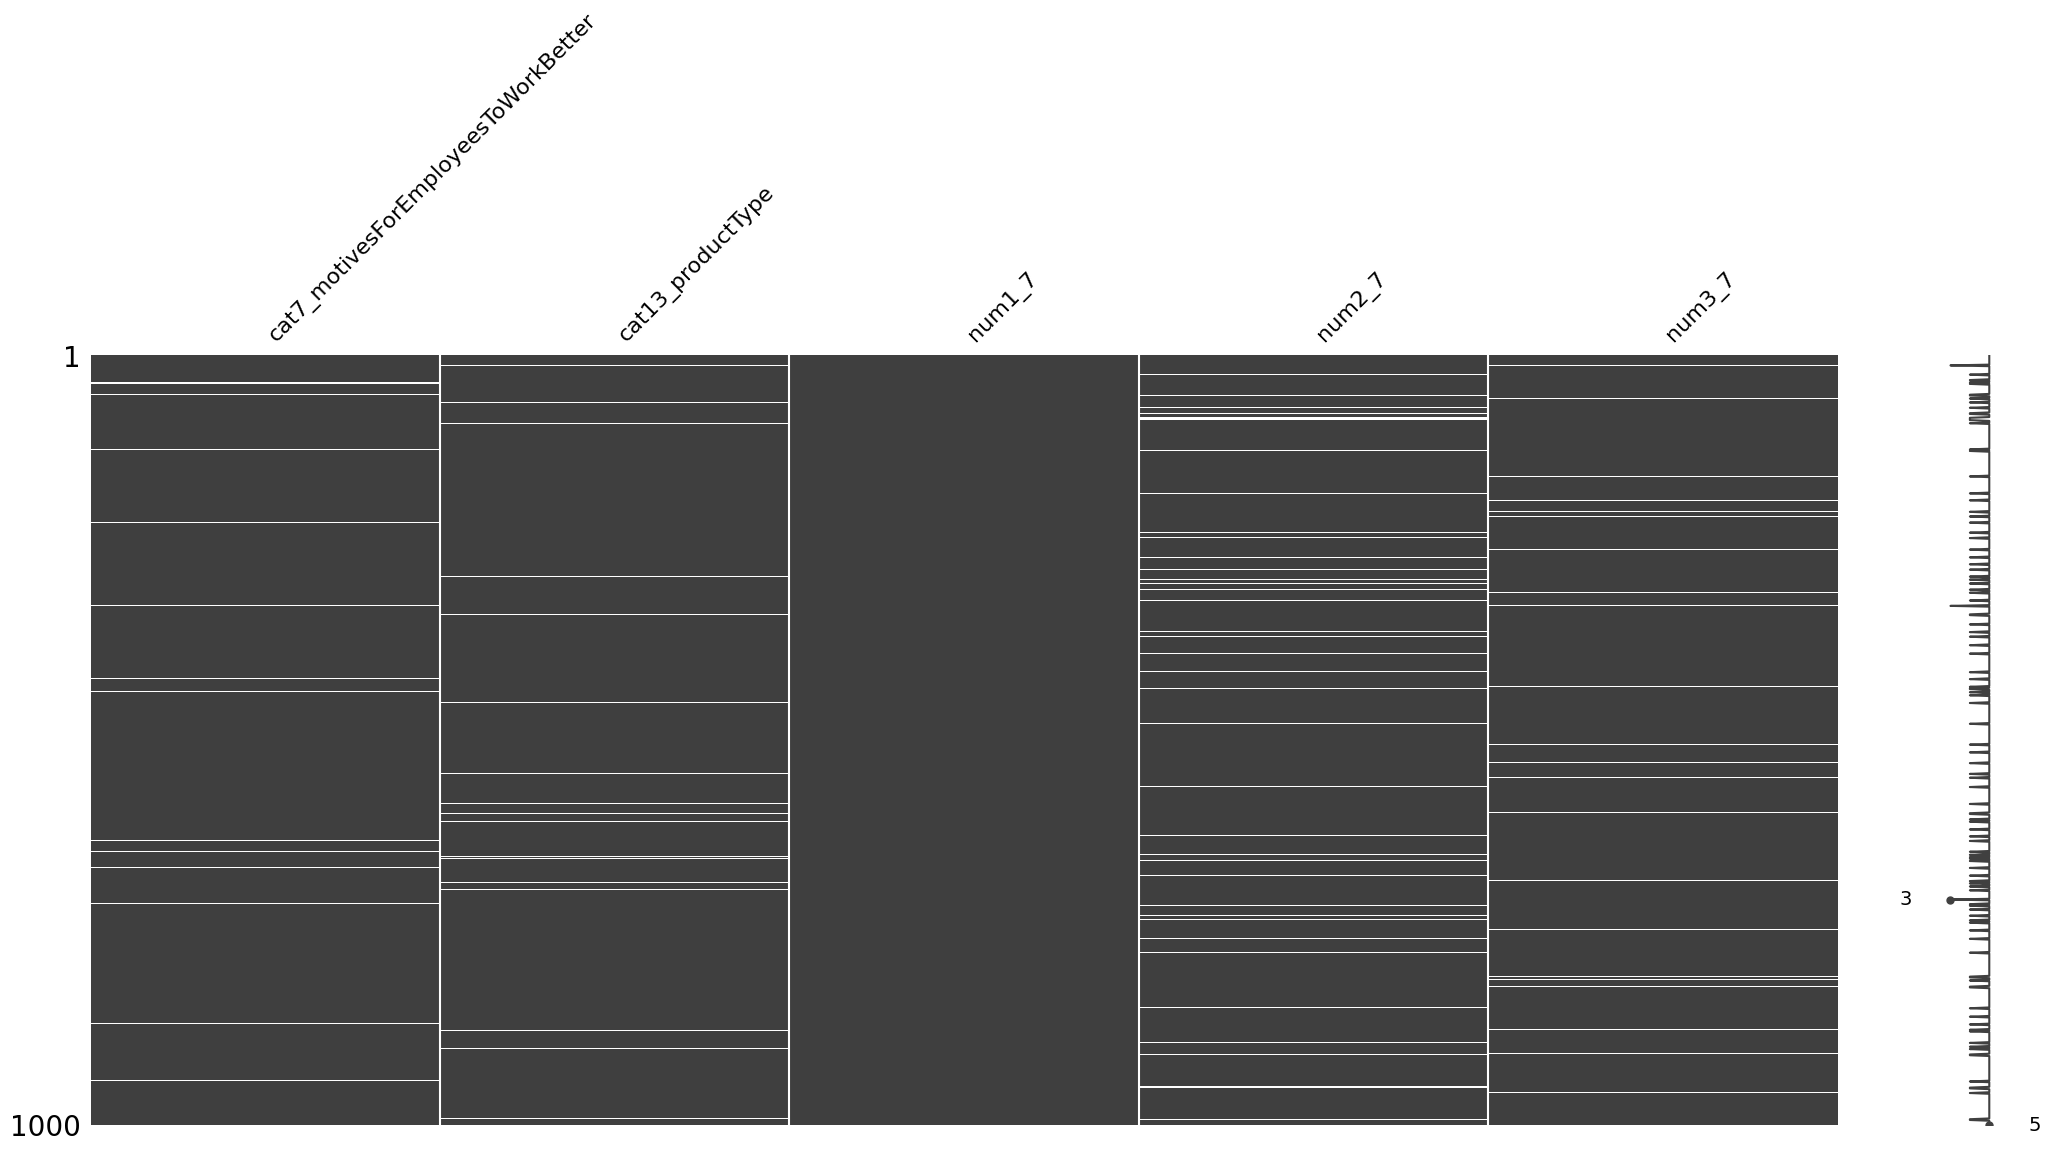

In [135]:
# Создадим копию для второго задания
data2 = data.copy()

# Посмотрим на пропущенные значения
missingno.matrix(data2)

In [136]:
# Список с некорректными значениями
value_for_find = ['-', ' ', -1, -9, 0, 'nan', np.nan]

# Создадим функцию, которая выводит всю статистику о dataframe
def info_table(df):
    count_rows = df.shape[0]
    
    print(f"Количество строк и столбцов: {df.shape}.\n")
    
    name_columns = df.columns.tolist()
    print(f"В таблице содержатся следующие столбцы: {name_columns}.\n")

    general_count_isnull = df.isnull().sum().sum()
    
    print("Для всей таблицы:\n")

    print(f"Количество строк, в которых содержится хоть одно значение nan: {general_count_isnull}. " + 
          f"Процент от общего количества: {general_count_isnull/count_rows*100}\n")
    
    for k in value_for_find:
            if pd.isna(k): 
                count = df.isna().sum().sum()      
            else:
                count = (df == k).sum().sum()
            print(f"Значение '{k}' встречается: {count} раз. {count/count_rows*100}% от общего количества")
    print()
    
    for name in name_columns:
        print(f"Тип данных в столбце {name}: {df[name].dtype}.")
        
        print(f"Количество уникальных значений в столбце {name}: {df[name].unique().shape}")
        
        print(f"Первые двадцать уникальных значений в столбце {name}: {df[name].unique()[:20:]}")
    
        for k in value_for_find:
            if pd.isna(k): 
                count = df[name].isna().sum()        
            else:
                count = (df[name] == k).sum() 
            print(f"Значение '{k}' в столбце {name} встречается: {count} раз. {count/count_rows*100}% от общего количества")
        print()


In [137]:
# Выведем статистику
info_table(data2)

Количество строк и столбцов: (1000, 5).

В таблице содержатся следующие столбцы: ['cat7_motivesForEmployeesToWorkBetter', 'cat13_productType', 'num1_7', 'num2_7', 'num3_7'].

Для всей таблицы:

Количество строк, в которых содержится хоть одно значение nan: 113. Процент от общего количества: 11.3

Значение '-' встречается: 69 раз. 6.9% от общего количества
Значение ' ' встречается: 70 раз. 7.000000000000001% от общего количества
Значение '-1' встречается: 0 раз. 0.0% от общего количества
Значение '-9' встречается: 0 раз. 0.0% от общего количества
Значение '0' встречается: 0 раз. 0.0% от общего количества
Значение 'nan' встречается: 0 раз. 0.0% от общего количества
Значение 'nan' встречается: 113 раз. 11.3% от общего количества

Тип данных в столбце cat7_motivesForEmployeesToWorkBetter: object.
Количество уникальных значений в столбце cat7_motivesForEmployeesToWorkBetter: (9,)
Первые двадцать уникальных значений в столбце cat7_motivesForEmployeesToWorkBetter: ['Peer motivation' 'Professi

In [138]:
data3 = data2.copy() # изначальный dataframe

# Заменим все неправильные значения из раннее определенного списка
data2 = data2.replace(value_for_find, np.nan)
data3 = data3.replace(value_for_find, np.nan)

# Уалим строки, в которых категориальные переменные содержат 'nan'
data2 = data2[~data2[['cat7_motivesForEmployeesToWorkBetter', 'cat13_productType']].isin([np.nan]).any(axis=1)]

# Преобразуем значения столбца num3_7 к float
data2['num3_7'] = data2['num3_7'].astype(float)
# data3['num3_7'] = data3['num3_7'].astype(float)

# Приведем значения категориальных пересенных к одному типу и регистру
data2['cat7_motivesForEmployeesToWorkBetter'] = data2['cat7_motivesForEmployeesToWorkBetter'].astype(str)
data2['cat13_productType'] = data2['cat13_productType'].astype(str)

data3['cat7_motivesForEmployeesToWorkBetter'] = data3['cat7_motivesForEmployeesToWorkBetter'].str.lower()
data3['cat13_productType'] = data3['cat13_productType'].str.lower()

# Создадим переменную с названиями столбцов количественных переменных
quantitative_columns = ['num1_7', 'num2_7', 'num3_7']

# Заменим значения nan для количественных значений средним значением для data2
for col in quantitative_columns:
    mean_of_col = data2[col].mean()
    data2[col] = data2[col].replace(np.nan, mean_of_col)

In [139]:
# Посмотрим data2
info_table(data2)

Количество строк и столбцов: (884, 5).

В таблице содержатся следующие столбцы: ['cat7_motivesForEmployeesToWorkBetter', 'cat13_productType', 'num1_7', 'num2_7', 'num3_7'].

Для всей таблицы:

Количество строк, в которых содержится хоть одно значение nan: 0. Процент от общего количества: 0.0

Значение '-' встречается: 0 раз. 0.0% от общего количества
Значение ' ' встречается: 0 раз. 0.0% от общего количества
Значение '-1' встречается: 0 раз. 0.0% от общего количества
Значение '-9' встречается: 0 раз. 0.0% от общего количества
Значение '0' встречается: 0 раз. 0.0% от общего количества
Значение 'nan' встречается: 0 раз. 0.0% от общего количества
Значение 'nan' встречается: 0 раз. 0.0% от общего количества

Тип данных в столбце cat7_motivesForEmployeesToWorkBetter: object.
Количество уникальных значений в столбце cat7_motivesForEmployeesToWorkBetter: (6,)
Первые двадцать уникальных значений в столбце cat7_motivesForEmployeesToWorkBetter: ['Peer motivation' 'Professional growth opportuniti

In [140]:
# Посмотрим data3
info_table(data3)

Количество строк и столбцов: (1000, 5).

В таблице содержатся следующие столбцы: ['cat7_motivesForEmployeesToWorkBetter', 'cat13_productType', 'num1_7', 'num2_7', 'num3_7'].

Для всей таблицы:

Количество строк, в которых содержится хоть одно значение nan: 252. Процент от общего количества: 25.2

Значение '-' встречается: 0 раз. 0.0% от общего количества
Значение ' ' встречается: 0 раз. 0.0% от общего количества
Значение '-1' встречается: 0 раз. 0.0% от общего количества
Значение '-9' встречается: 0 раз. 0.0% от общего количества
Значение '0' встречается: 0 раз. 0.0% от общего количества
Значение 'nan' встречается: 0 раз. 0.0% от общего количества
Значение 'nan' встречается: 252 раз. 25.2% от общего количества

Тип данных в столбце cat7_motivesForEmployeesToWorkBetter: object.
Количество уникальных значений в столбце cat7_motivesForEmployeesToWorkBetter: (5,)
Первые двадцать уникальных значений в столбце cat7_motivesForEmployeesToWorkBetter: ['peer motivation' 'professional growth oppo

## Задание 3. Поиск аномальных значений.
Провести поиск значений в исходном наборе данных, резко
отличающихся от других значений (выбросов). Строки с
найденными выбросами удалить из исходного набора данных.
Примечание: для поиска выбросов воспользоваться методом сигм
(использовать готовую реализацию scipy.stats.sigmaclip) и метод
квартилей (реализовать самостоятельно). Провести анализ
полученных результатов. Использовать результаты очистки данных,
полученных с помощью метода сигм.


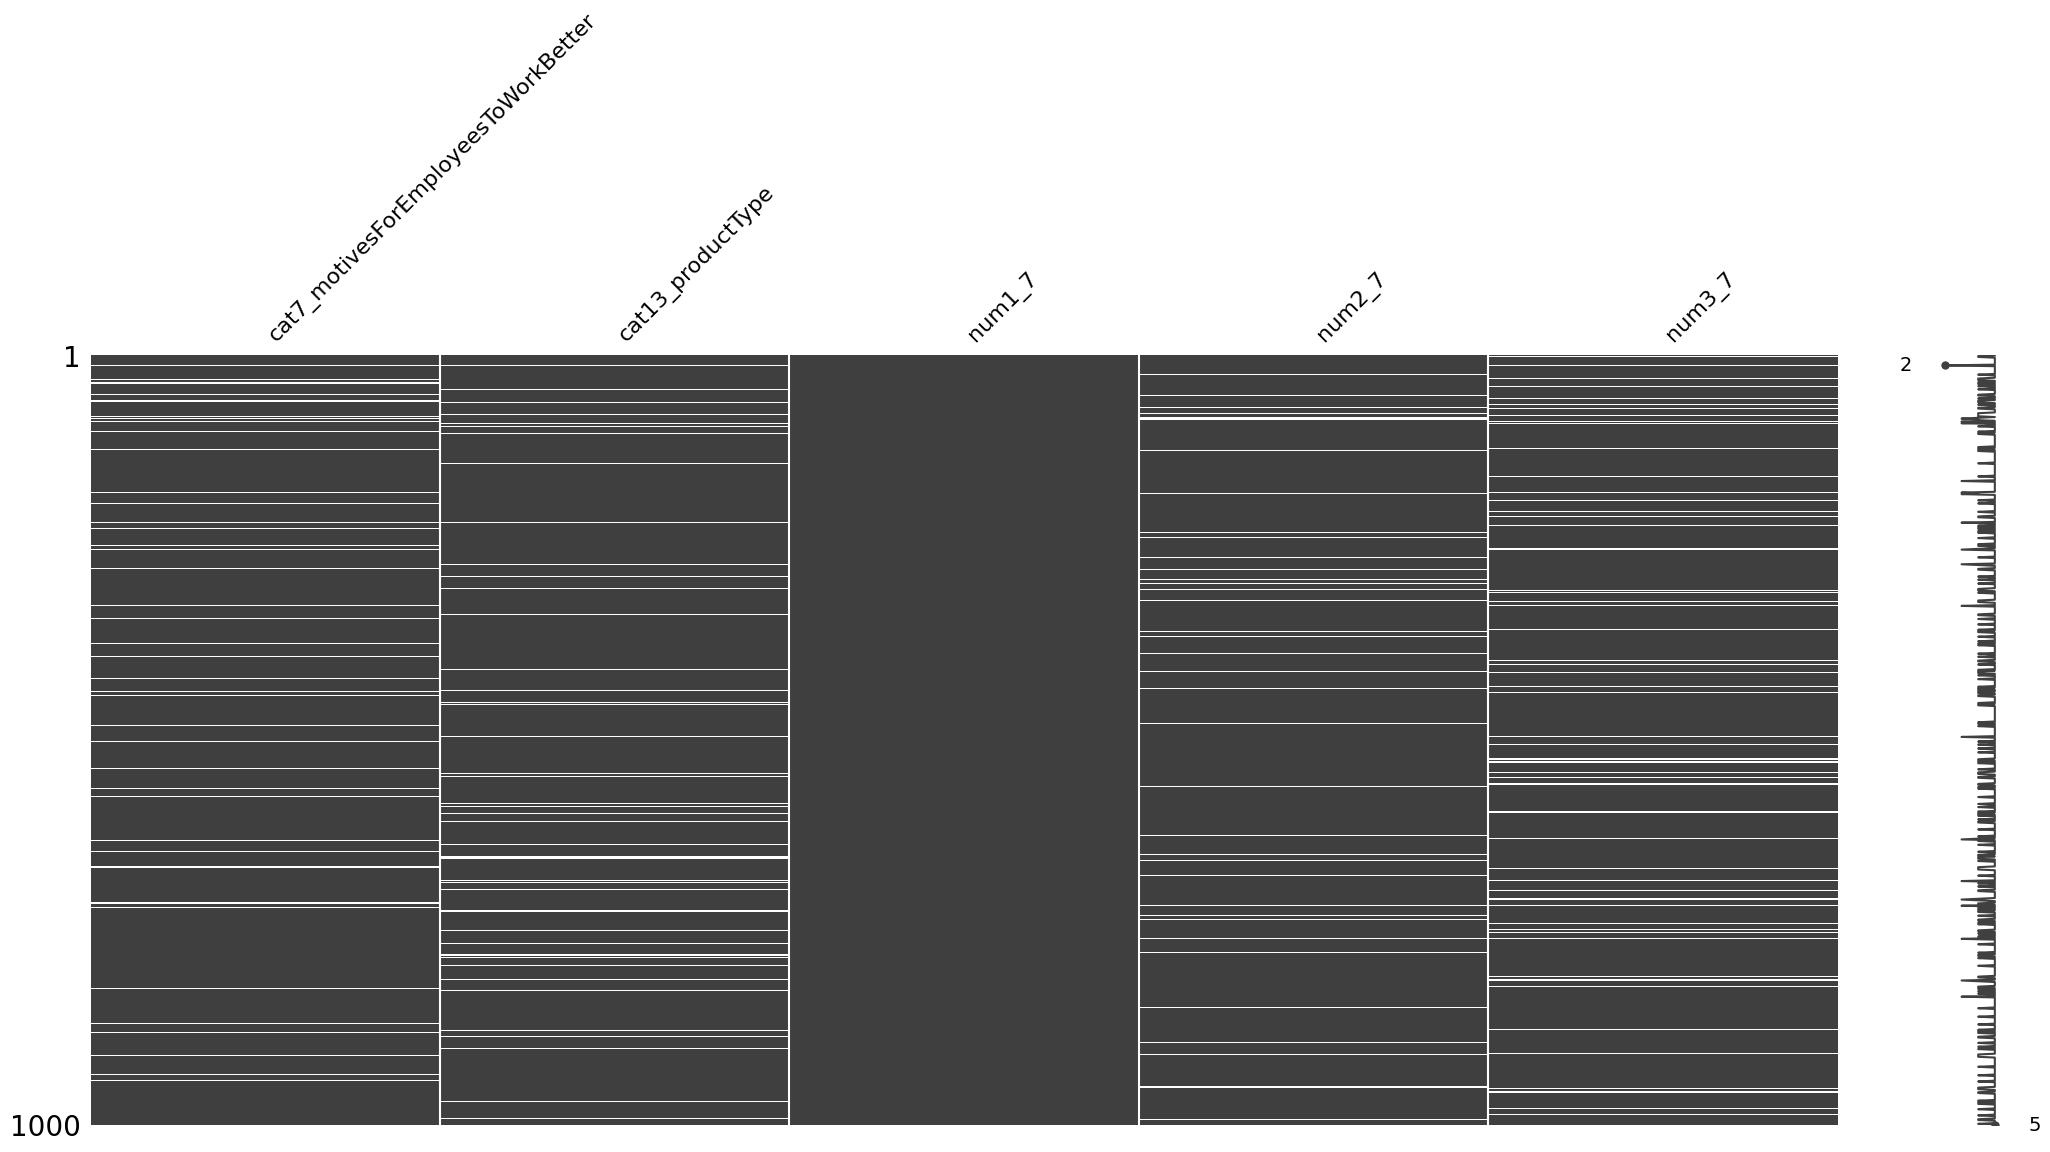

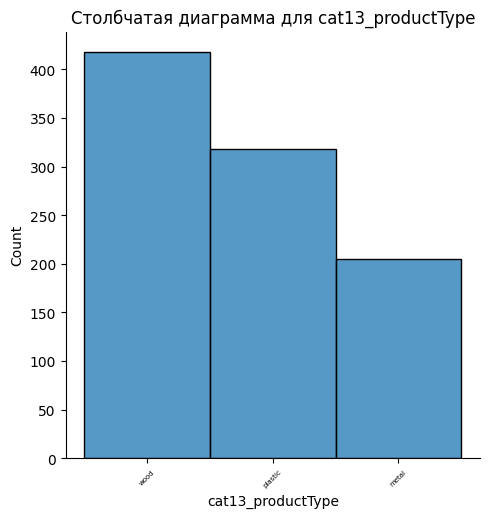

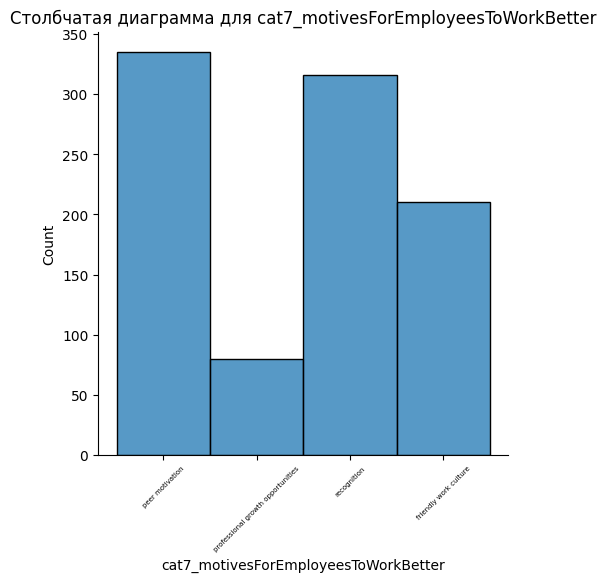

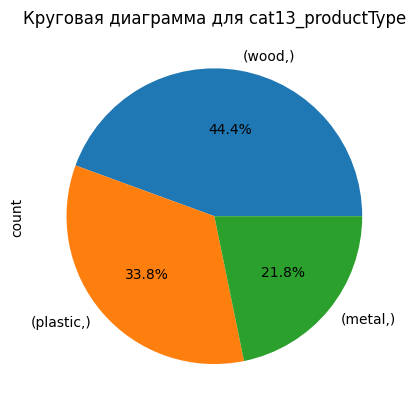

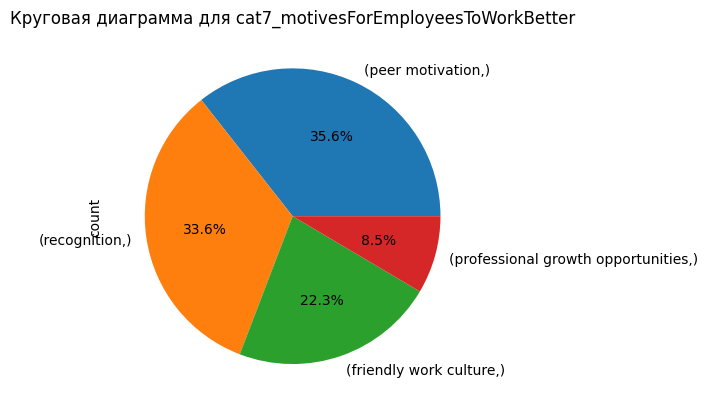

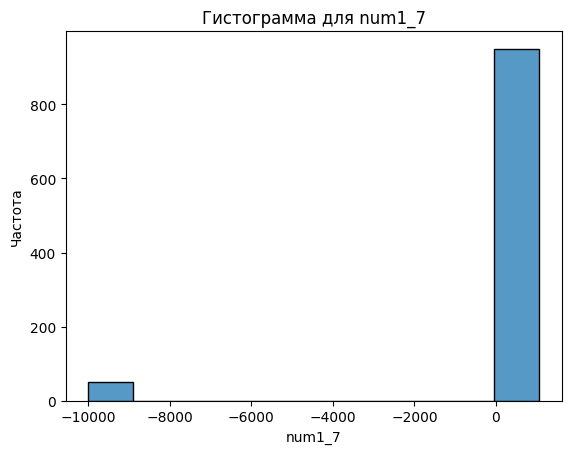

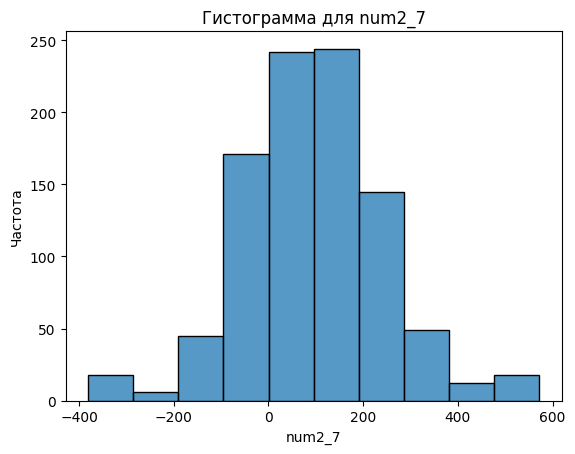

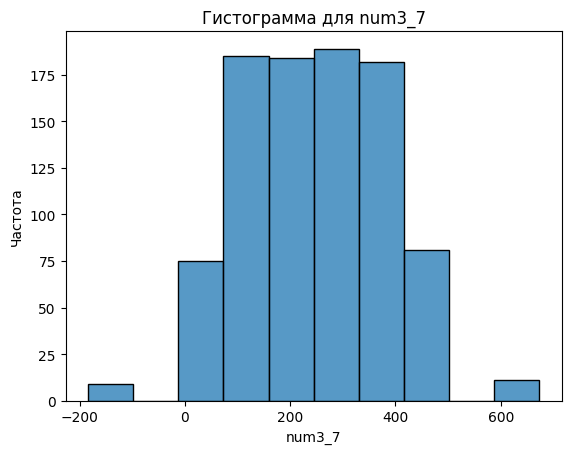

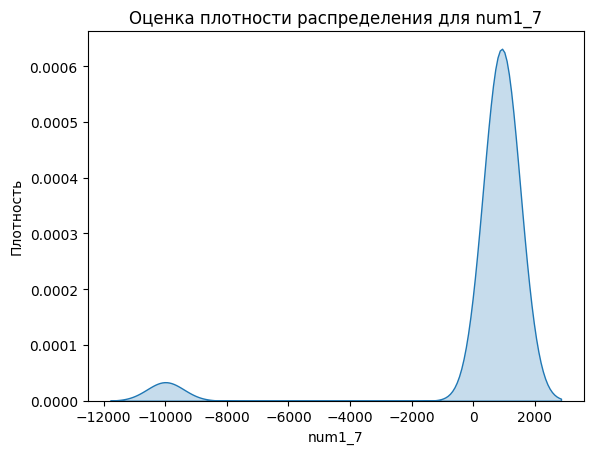

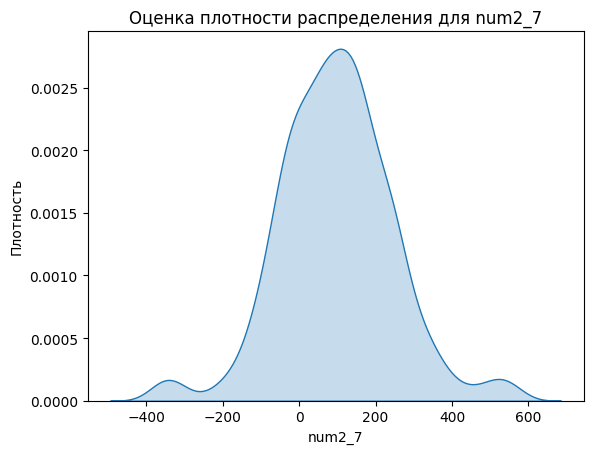

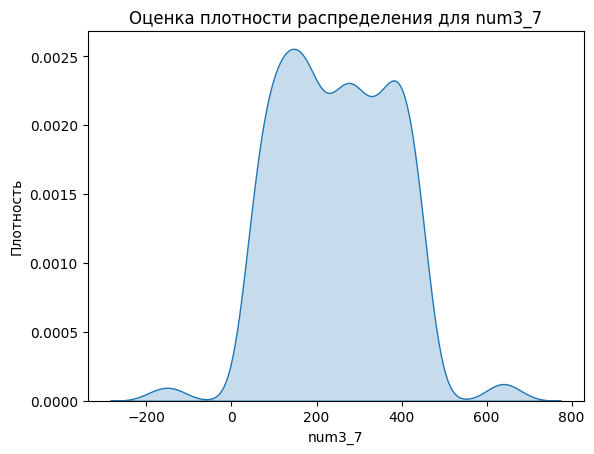

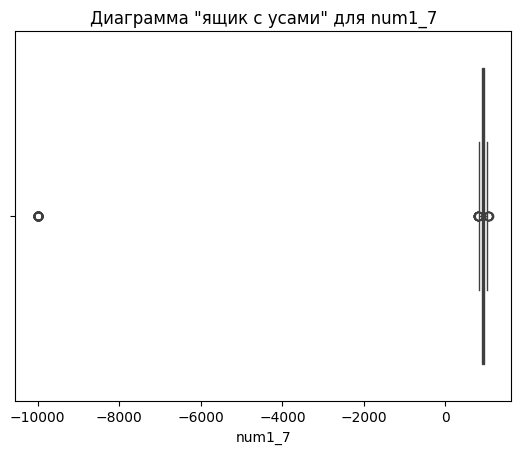

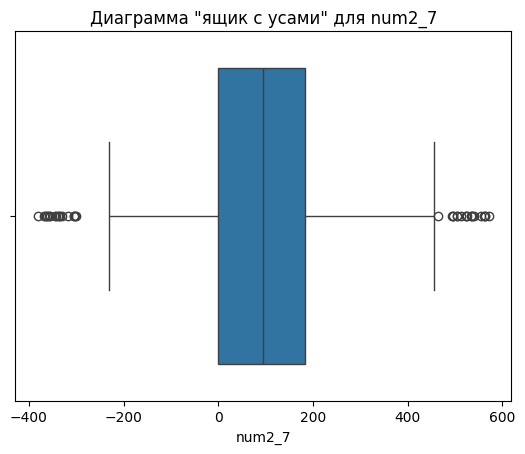

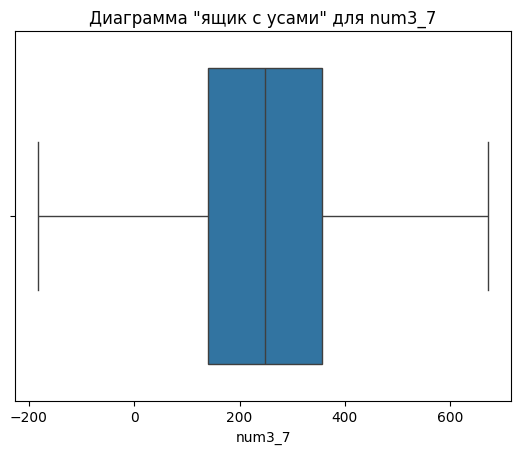

In [141]:
# Посмотрим на пропуски и диаграммы
missingno.matrix(data3)
calls_all_diagrams(data3)

In [142]:
# Посмотрим на статистику
info_table(data3)

Количество строк и столбцов: (1000, 5).

В таблице содержатся следующие столбцы: ['cat7_motivesForEmployeesToWorkBetter', 'cat13_productType', 'num1_7', 'num2_7', 'num3_7'].

Для всей таблицы:

Количество строк, в которых содержится хоть одно значение nan: 252. Процент от общего количества: 25.2

Значение '-' встречается: 0 раз. 0.0% от общего количества
Значение ' ' встречается: 0 раз. 0.0% от общего количества
Значение '-1' встречается: 0 раз. 0.0% от общего количества
Значение '-9' встречается: 0 раз. 0.0% от общего количества
Значение '0' встречается: 0 раз. 0.0% от общего количества
Значение 'nan' встречается: 0 раз. 0.0% от общего количества
Значение 'nan' встречается: 252 раз. 25.2% от общего количества

Тип данных в столбце cat7_motivesForEmployeesToWorkBetter: object.
Количество уникальных значений в столбце cat7_motivesForEmployeesToWorkBetter: (5,)
Первые двадцать уникальных значений в столбце cat7_motivesForEmployeesToWorkBetter: ['peer motivation' 'professional growth oppo

In [143]:
from scipy.stats import sigmaclip
# help(scipy.stats.sigmaclip)
def statistics_for_quantitative_columns(data3):
    statistics = {}
    
    # Выведем статистику для каждого столбца количественных переменных
    for i in quantitative_columns:
        print(f"Статистика для столбца {i}:")
        stat = data3[i].describe()
        statistics[i] = stat
        print(stat)
        print()
        
statistics_for_quantitative_columns(data3)

Статистика для столбца num1_7:
count    1000.000000
mean      382.906888
std      2383.294435
min     -9999.000000
25%       898.061108
50%       928.078279
75%       954.652252
max      1059.758094
Name: num1_7, dtype: float64

Статистика для столбца num2_7:
count    950.000000
mean      97.236275
std      148.872848
min     -380.846250
25%       -1.129423
50%       93.749787
75%      183.519924
max      571.657153
Name: num2_7, dtype: float64

Статистика для столбца num3_7:
count    916.000000
mean     246.529441
std      133.006874
min     -183.570496
25%      140.210945
50%      248.097343
75%      356.878351
max      672.927485
Name: num3_7, dtype: float64



Найдем строки, которые содержат выбросы в своей колонке c помощью метода sigmaclip. Предельные значения будем рассчитывать по 25% и 75%

In [144]:
# УДАЛИТЬ ПОТОМ ЭТОТ БЛОК

# for name in quantitative_columns:
#     lower = statistics[name]['25%']/statistics[name]['std']
#     upper = statistics[name]['75%']/statistics[name]['std']
#     print(lower)s
#     print(upper)

#     low = statistics[name]['mean'] - lower * statistics[name]['std']
#     up = statistics[name]['mean'] + upper * statistics[name]['std']
#     print(low)
#     print(up)

# # for name in quantitative_columns:
# #     # mas = sigmaclip(data2[name], low=statistics[name]['25%']/statistics[name]['std'], high=statistics[name]['75%']/statistics[name]['std'])
# #     mas = sigmaclip(data2[[name]], low=3, high=3)

# for name in quantitative_columns:
#     std_dev = data2[name].std()
#     q25 = data2[name].quantile(0.25)
#     q75 = data2[name].quantile(0.75)
#     low = q25 / std_dev
#     high = q75 / std_dev
#     mas = sigmaclip(data2[name], low=low, high=high)
#     values_of_sigmaclip[name] = mas
    
    # values_of_sigmaclip[name] = mas
# print(values_of_sigmaclip)

In [145]:
values_of_sigmaclip = {}

# Применим метод sigmaclip для каждого столбца и результаты в словарь
for name in quantitative_columns:
    mas = sigmaclip(data3[name], low=3, high=3)
    values_of_sigmaclip[name] = mas

# Выведем результаты
for i in quantitative_columns:
    print(f"Нижняя граница {i}: {values_of_sigmaclip[i].lower}")
    print(f"Верхняя граница {i}: {values_of_sigmaclip[i].upper}")
    # print(f"Массив значений {i}: {values_of_sigmaclip[i].clipped}")

Нижняя граница num1_7: 815.330315026143
Верхняя граница num1_7: 1044.1903042583249
Нижняя граница num2_7: nan
Верхняя граница num2_7: nan
Нижняя граница num3_7: nan
Верхняя граница num3_7: nan


D:\Python\lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\Python\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
D:\Python\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
D:\Python\lib\site-packages\scipy\stats\_stats_py.py:3707: RuntimeWarning: Mean of empty slice.
  c_mean = c.mean()
D:\Python\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Заменим значения nan для количественных переменных средним значением в каждом столбце

In [146]:
# Заменим значения nan для количественных значений средним значением
for col in quantitative_columns:
    mean_of_col = data3[col].mean()
    data3[col] = data3[col].replace(np.nan, mean_of_col)

In [147]:
# Снова применим метод sigmaclip
# Применим метод sigmaclip для каждого столбца и результаты в словарь
for name in quantitative_columns:
    mas = sigmaclip(data3[name], low=3, high=3)
    values_of_sigmaclip[name] = mas

# Выведем результаты
for i in quantitative_columns:
    print(f"Нижняя граница {i}: {values_of_sigmaclip[i].lower}")
    print(f"Верхняя граница {i}: {values_of_sigmaclip[i].upper}")
    # print(f"Массив значений {i}: {values_of_sigmaclip[i].clipped}")

Нижняя граница num1_7: 815.330315026143
Верхняя граница num1_7: 1044.1903042583249
Нижняя граница num2_7: -265.745178466996
Верхняя граница num2_7: 459.59596546844716
Нижняя граница num3_7: -100.28971454560028
Верхняя граница num3_7: 591.821431987697


In [148]:
# Определим границы для выбросов методом межквартильного диапозона

# «Внутренние границы» значений в данных
# 𝑄1 − 1.5 ∙ 𝑄3 − 𝑄1 , 𝑄3 + 1.5 ∙ 𝑄3 − 𝑄1 = [67.75, 73.75]
# ▪ «Внешние границы» данных
# 𝑄1 − 3 ∙ 𝑄3 − 𝑄1 , 𝑄3 + 3 ∙ 𝑄3 − 𝑄1 = [65.5, 76]
# Значение, лежащее вне «внутренних границ», классифицируется как «незначительный
# выброс», в то время как значение, находящееся за «внешними границами»,
# классифицируется как «значительный выброс».

def find_blowout(columns, data):
    values_of_iqr = {}
    for col in columns:
        q25 = data[col].quantile(0.25)
        q75 = data[col].quantile(0.75)
        iqr = q75 - q25
        low = q25 - 1.5 * iqr
        up = q75 + 1.5 * iqr
        values_of_iqr[col] = [low, up]
    return values_of_iqr

print(find_blowout(quantitative_columns, data3))

{'num1_7': [813.1743934542853, 1039.5389668716018], 'num2_7': [-258.25790662628117, 439.1350969100278], 'num3_7': [-151.5932567411561, 646.2105663641241]}


In [149]:
values_of_sigmaclip

{'num1_7': SigmaclipResult(clipped=array([ 928.00326432,  942.68361657,  986.82799201,  940.82464543,
         908.79423589,  872.60936026,  923.56796895,  939.35797863,
         905.22897964,  909.77400267,  878.11561391,  864.35960511,
         960.59936495,  991.19473994,  942.82962904,  945.37479411,
         907.32513174, 1015.93627103,  918.69265883,  939.59862566,
         944.07047899,  915.75152317,  948.06914132,  945.22396316,
         876.06371356,  834.83101472,  965.83016743,  946.63904036,
         902.22443196,  965.80142417,  897.38184353, 1005.94023246,
         919.32415636, 1017.03456248,  844.35380818,  926.50218199,
         900.57300155, 1006.28823146,  989.78421134,  961.258195  ,
         885.07069905,  946.93649565,  894.36517462,  882.35262053,
         938.02245408,  978.31783121,  951.65814897,  937.19920778,
         971.60022089,  910.12282704,  933.52502233,  986.22826176,
         835.48718452,  963.91228749,  928.15329315,  906.14905719,
         950.5

In [150]:
# Удалим строки, которые не входят в диапозон значений sigmaclip

data4 = data3.copy() 

for name in quantitative_columns:
    data3 = data3[data3[name].isin(values_of_sigmaclip[name].clipped)]
    
print(data3)

    cat7_motivesForEmployeesToWorkBetter cat13_productType      num1_7  \
0                        peer motivation              wood  928.003264   
1      professional growth opportunities           plastic  942.683617   
2                        peer motivation               NaN  986.827992   
3                            recognition           plastic  940.824645   
4                            recognition             metal  908.794236   
..                                   ...               ...         ...   
995                      peer motivation              wood  935.758683   
996                      peer motivation              wood  924.223222   
997                friendly work culture             metal  903.939907   
998                          recognition              wood  874.669893   
999                friendly work culture              wood  922.671336   

         num2_7      num3_7  
0    230.711895   63.103060  
1    -54.555626  246.529441  
2    159.587517  100.

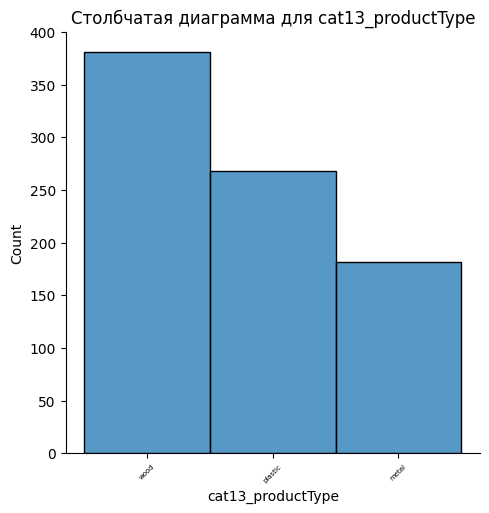

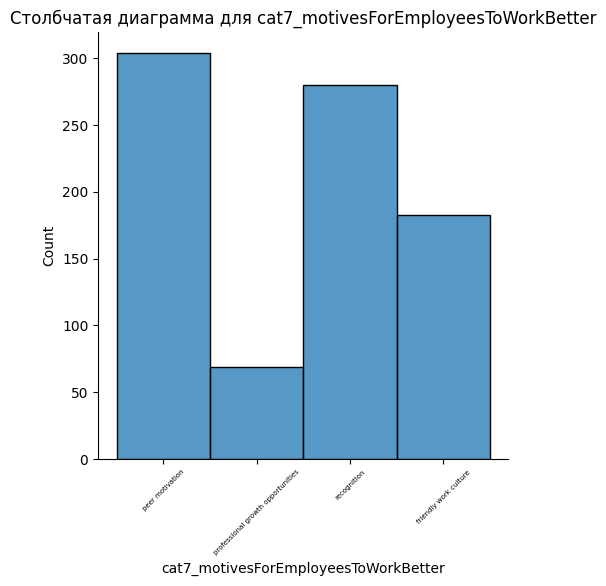

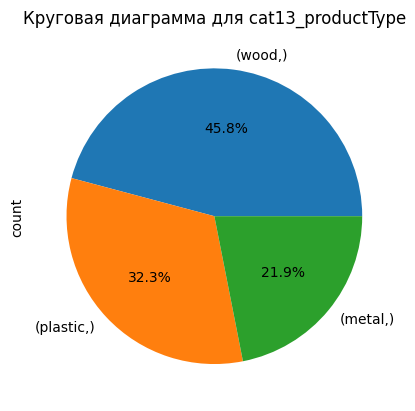

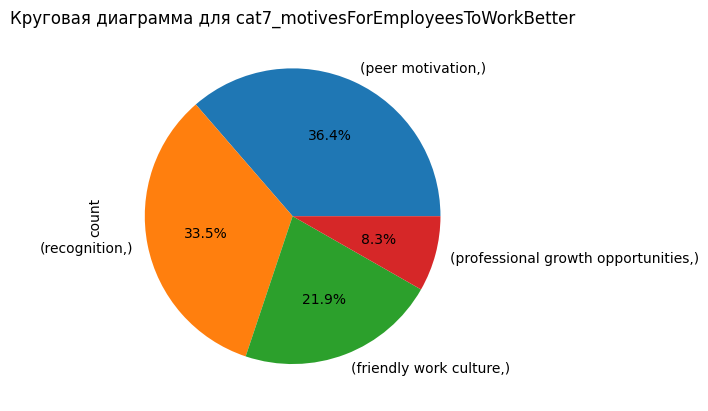

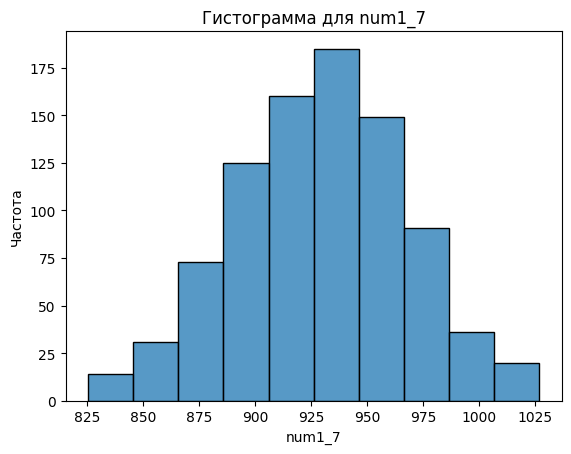

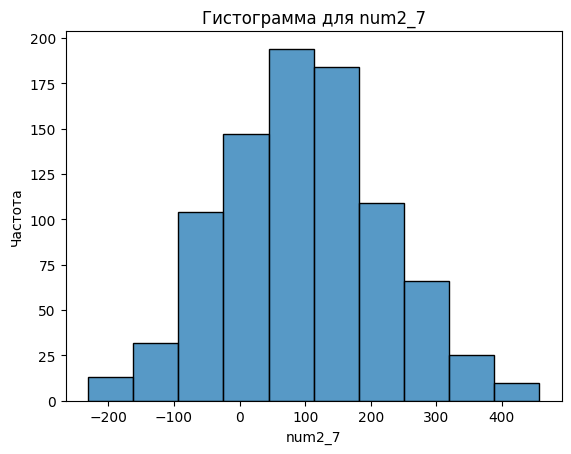

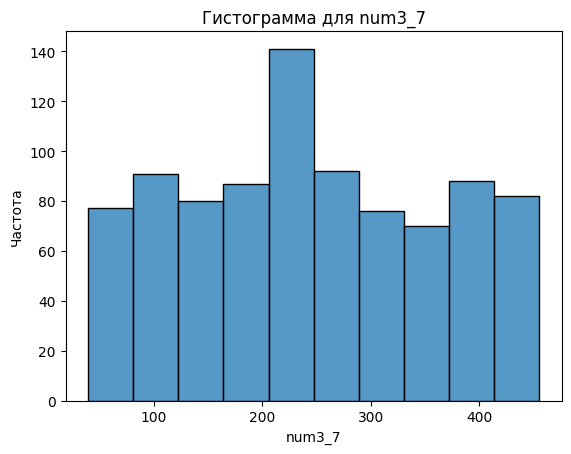

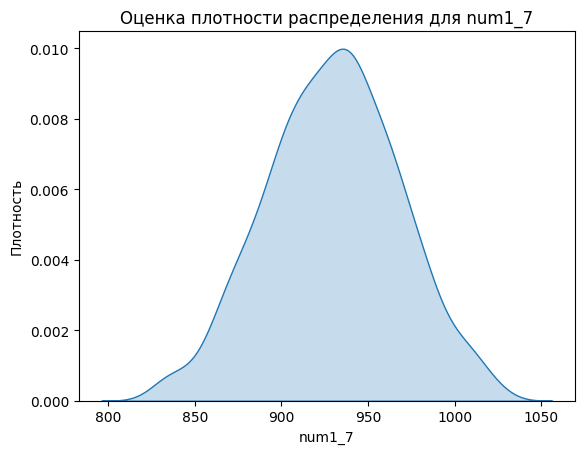

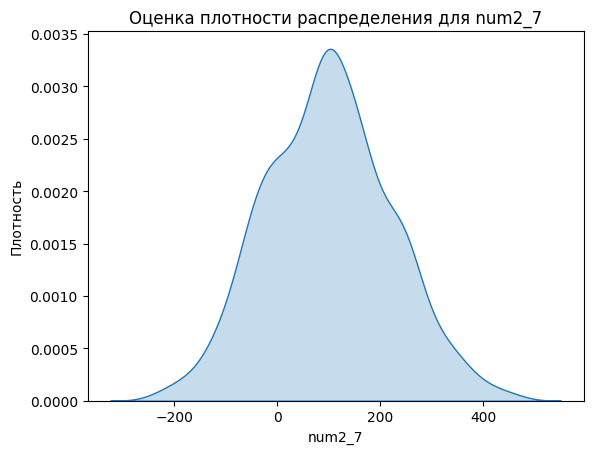

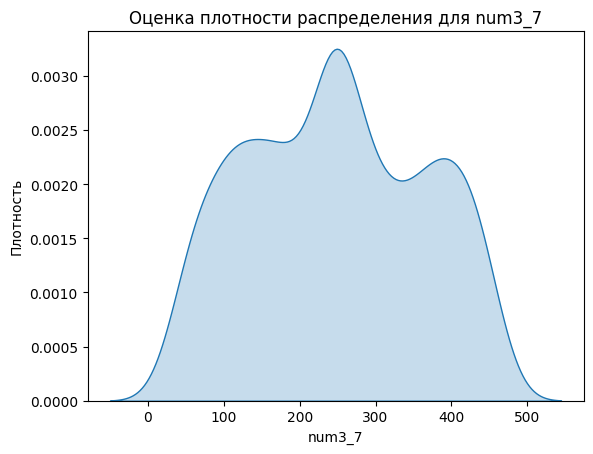

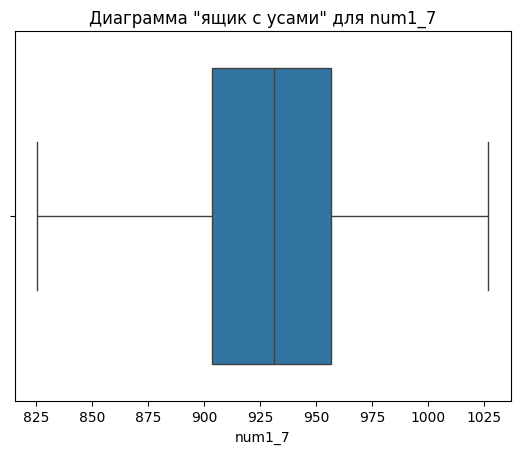

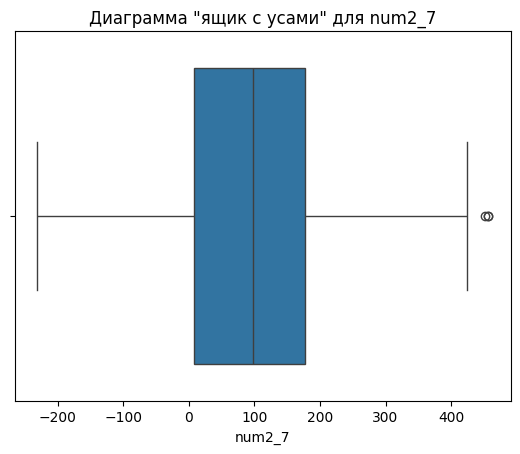

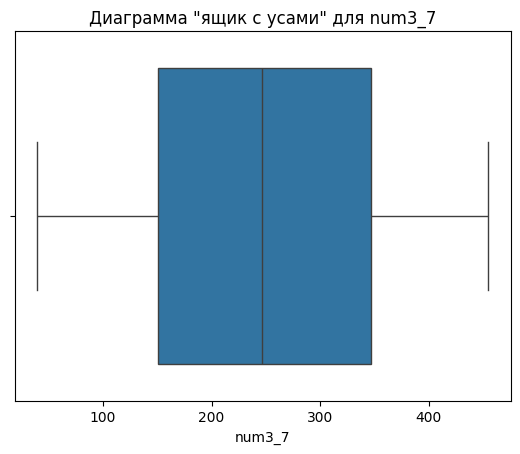

In [151]:
# Посмотрим на диаграммы
calls_all_diagrams(data3)

In [152]:
# Посмотрим на статистику
statistics_for_quantitative_columns(data3)

Статистика для столбца num1_7:
count     884.000000
mean      929.686556
std        38.299888
min       825.602082
25%       903.486712
50%       931.052671
75%       956.604971
max      1026.847657
Name: num1_7, dtype: float64

Статистика для столбца num2_7:
count    884.000000
mean      98.805513
std      122.062232
min     -230.855493
25%        7.779496
50%       97.236275
75%      176.635569
max      456.682114
Name: num2_7, dtype: float64

Статистика для столбца num3_7:
count    884.000000
mean     246.939450
std      115.670177
min       39.635329
25%      150.819002
50%      246.529441
75%      347.034133
max      454.957401
Name: num3_7, dtype: float64



In [153]:
# Посмотрим на информацию
info_table(data3)

Количество строк и столбцов: (884, 5).

В таблице содержатся следующие столбцы: ['cat7_motivesForEmployeesToWorkBetter', 'cat13_productType', 'num1_7', 'num2_7', 'num3_7'].

Для всей таблицы:

Количество строк, в которых содержится хоть одно значение nan: 101. Процент от общего количества: 11.425339366515837

Значение '-' встречается: 0 раз. 0.0% от общего количества
Значение ' ' встречается: 0 раз. 0.0% от общего количества
Значение '-1' встречается: 0 раз. 0.0% от общего количества
Значение '-9' встречается: 0 раз. 0.0% от общего количества
Значение '0' встречается: 0 раз. 0.0% от общего количества
Значение 'nan' встречается: 0 раз. 0.0% от общего количества
Значение 'nan' встречается: 101 раз. 11.425339366515837% от общего количества

Тип данных в столбце cat7_motivesForEmployeesToWorkBetter: object.
Количество уникальных значений в столбце cat7_motivesForEmployeesToWorkBetter: (5,)
Первые двадцать уникальных значений в столбце cat7_motivesForEmployeesToWorkBetter: ['peer motivation

## Задание 4. Поиск и восстановление пропущенных значений.
Провести поиск пропущенных значений в исходных данных. 
Вывести статистику по пропускам для каждого признака 
Восстановить пропущенные значени . Примечание: для перво о
признака для восстановления пропусков использовать метk �-
ближайших соседей, для второго пропущенные значения заме ить
самым популярным значением, для третьего использовать ср днее
значение, для четвертого – медиану, для пятого – мkо «𝑘-
ближайших соседей». Для восстановления пропусков методом «kближайших соседей» использовать одну из готовых реа изаций
sklearn.impute.KNNImputer, impyute.imputation.cs.fast_knn).

In [154]:
info_table(data4)

Количество строк и столбцов: (1000, 5).

В таблице содержатся следующие столбцы: ['cat7_motivesForEmployeesToWorkBetter', 'cat13_productType', 'num1_7', 'num2_7', 'num3_7'].

Для всей таблицы:

Количество строк, в которых содержится хоть одно значение nan: 118. Процент от общего количества: 11.799999999999999

Значение '-' встречается: 0 раз. 0.0% от общего количества
Значение ' ' встречается: 0 раз. 0.0% от общего количества
Значение '-1' встречается: 0 раз. 0.0% от общего количества
Значение '-9' встречается: 0 раз. 0.0% от общего количества
Значение '0' встречается: 0 раз. 0.0% от общего количества
Значение 'nan' встречается: 0 раз. 0.0% от общего количества
Значение 'nan' встречается: 118 раз. 11.799999999999999% от общего количества

Тип данных в столбце cat7_motivesForEmployeesToWorkBetter: object.
Количество уникальных значений в столбце cat7_motivesForEmployeesToWorkBetter: (5,)
Первые двадцать уникальных значений в столбце cat7_motivesForEmployeesToWorkBetter: ['peer motivatio

Выполним заполнение пропусков в первом столбце методом k-ближайших соседей

In [155]:
# Создадим функции для представление категориального признака в виде чисел (и наоборот)
def perform_change(ar):
    uniq_val = ar.unique()
    decoder = {}
    count = 1
    for i in uniq_val:
        if pd.isna(i):
            decoder[count] = i
            count += 1
            continue
        ar.replace(i, count, inplace=True)
        decoder[count] = i
        count += 1
    return decoder

def perform_decoder(ar, decoder):
    for key, value in decoder.items():
        ar.replace(key, value, inplace=True)

Для data4

In [156]:
# Выполним заполнение пропусков в первом столбце методом k-ближайших соседей
knnimpute_data = data4.copy()

In [157]:
info_table(knnimpute_data)

Количество строк и столбцов: (1000, 5).

В таблице содержатся следующие столбцы: ['cat7_motivesForEmployeesToWorkBetter', 'cat13_productType', 'num1_7', 'num2_7', 'num3_7'].

Для всей таблицы:

Количество строк, в которых содержится хоть одно значение nan: 118. Процент от общего количества: 11.799999999999999

Значение '-' встречается: 0 раз. 0.0% от общего количества
Значение ' ' встречается: 0 раз. 0.0% от общего количества
Значение '-1' встречается: 0 раз. 0.0% от общего количества
Значение '-9' встречается: 0 раз. 0.0% от общего количества
Значение '0' встречается: 0 раз. 0.0% от общего количества
Значение 'nan' встречается: 0 раз. 0.0% от общего количества
Значение 'nan' встречается: 118 раз. 11.799999999999999% от общего количества

Тип данных в столбце cat7_motivesForEmployeesToWorkBetter: object.
Количество уникальных значений в столбце cat7_motivesForEmployeesToWorkBetter: (5,)
Первые двадцать уникальных значений в столбце cat7_motivesForEmployeesToWorkBetter: ['peer motivatio

In [158]:


# Закодируем категориальные столбый
decoder_for_data4_1 = perform_change(knnimpute_data['cat7_motivesForEmployeesToWorkBetter'])
decoder_for_data4_2 = perform_change(knnimpute_data['cat13_productType'])

In [159]:
info_table(knnimpute_data)

Количество строк и столбцов: (1000, 5).

В таблице содержатся следующие столбцы: ['cat7_motivesForEmployeesToWorkBetter', 'cat13_productType', 'num1_7', 'num2_7', 'num3_7'].

Для всей таблицы:

Количество строк, в которых содержится хоть одно значение nan: 118. Процент от общего количества: 11.799999999999999

Значение '-' встречается: 0 раз. 0.0% от общего количества
Значение ' ' встречается: 0 раз. 0.0% от общего количества
Значение '-1' встречается: 0 раз. 0.0% от общего количества
Значение '-9' встречается: 0 раз. 0.0% от общего количества
Значение '0' встречается: 0 раз. 0.0% от общего количества
Значение 'nan' встречается: 0 раз. 0.0% от общего количества
Значение 'nan' встречается: 118 раз. 11.799999999999999% от общего количества

Тип данных в столбце cat7_motivesForEmployeesToWorkBetter: float64.
Количество уникальных значений в столбце cat7_motivesForEmployeesToWorkBetter: (5,)
Первые двадцать уникальных значений в столбце cat7_motivesForEmployeesToWorkBetter: [ 1.  2.  3.  4

In [160]:
knn = KNNImputer(n_neighbors=5, weights='distance')

scaler = StandardScaler()

In [161]:
knnimpute_data = scaler.fit_transform(knnimpute_data) # стандартизируем

In [162]:
knnimpute_data_imputed_temp = knn.fit_transform(knnimpute_data) # заполняем

In [163]:
knnimpute_data = scaler.inverse_transform(knnimpute_data_imputed_temp)

In [164]:
knnimpute_data = pd.DataFrame(knnimpute_data)
knnimpute_data = knnimpute_data[0].astype(int).astype(float)
perform_decoder(knnimpute_data, decoder_for_data4_1)

In [165]:
# Применим заполненные данные к столб
data4['cat7_motivesForEmployeesToWorkBetter'] = knnimpute_data.values
info_table(data4)

Количество строк и столбцов: (1000, 5).

В таблице содержатся следующие столбцы: ['cat7_motivesForEmployeesToWorkBetter', 'cat13_productType', 'num1_7', 'num2_7', 'num3_7'].

Для всей таблицы:

Количество строк, в которых содержится хоть одно значение nan: 59. Процент от общего количества: 5.8999999999999995

Значение '-' встречается: 0 раз. 0.0% от общего количества
Значение ' ' встречается: 0 раз. 0.0% от общего количества
Значение '-1' встречается: 0 раз. 0.0% от общего количества
Значение '-9' встречается: 0 раз. 0.0% от общего количества
Значение '0' встречается: 0 раз. 0.0% от общего количества
Значение 'nan' встречается: 0 раз. 0.0% от общего количества
Значение 'nan' встречается: 59 раз. 5.8999999999999995% от общего количества

Тип данных в столбце cat7_motivesForEmployeesToWorkBetter: object.
Количество уникальных значений в столбце cat7_motivesForEmployeesToWorkBetter: (4,)
Первые двадцать уникальных значений в столбце cat7_motivesForEmployeesToWorkBetter: ['peer motivation'

Для data3

In [166]:
knnimpute_data = data3.copy()

# Закодируем категориальные столбый
decoder_for_data3_1 = perform_change(knnimpute_data['cat7_motivesForEmployeesToWorkBetter'])
decoder_for_data4_2 = perform_change(knnimpute_data['cat13_productType'])

knn = KNNImputer(n_neighbors=5, weights='distance')

scaler = StandardScaler()

knnimpute_data = scaler.fit_transform(knnimpute_data) # стандартизируем

knnimpute_data_imputed_temp = knn.fit_transform(knnimpute_data) # заполняем

knnimpute_data = scaler.inverse_transform(knnimpute_data_imputed_temp)

knnimpute_data = pd.DataFrame(knnimpute_data)
knnimpute_data = knnimpute_data[0].astype(int).astype(float)
perform_decoder(knnimpute_data, decoder_for_data3_1)

# Применим заполненные данные к столб
data3['cat7_motivesForEmployeesToWorkBetter'] = knnimpute_data.values
# т.к. индексы не совпадают
info_table(data3)

Количество строк и столбцов: (884, 5).

В таблице содержатся следующие столбцы: ['cat7_motivesForEmployeesToWorkBetter', 'cat13_productType', 'num1_7', 'num2_7', 'num3_7'].

Для всей таблицы:

Количество строк, в которых содержится хоть одно значение nan: 53. Процент от общего количества: 5.995475113122172

Значение '-' встречается: 0 раз. 0.0% от общего количества
Значение ' ' встречается: 0 раз. 0.0% от общего количества
Значение '-1' встречается: 0 раз. 0.0% от общего количества
Значение '-9' встречается: 0 раз. 0.0% от общего количества
Значение '0' встречается: 0 раз. 0.0% от общего количества
Значение 'nan' встречается: 0 раз. 0.0% от общего количества
Значение 'nan' встречается: 53 раз. 5.995475113122172% от общего количества

Тип данных в столбце cat7_motivesForEmployeesToWorkBetter: object.
Количество уникальных значений в столбце cat7_motivesForEmployeesToWorkBetter: (4,)
Первые двадцать уникальных значений в столбце cat7_motivesForEmployeesToWorkBetter: ['peer motivation' 'p

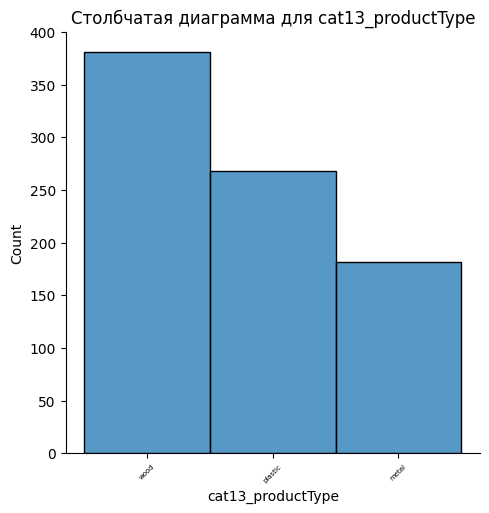

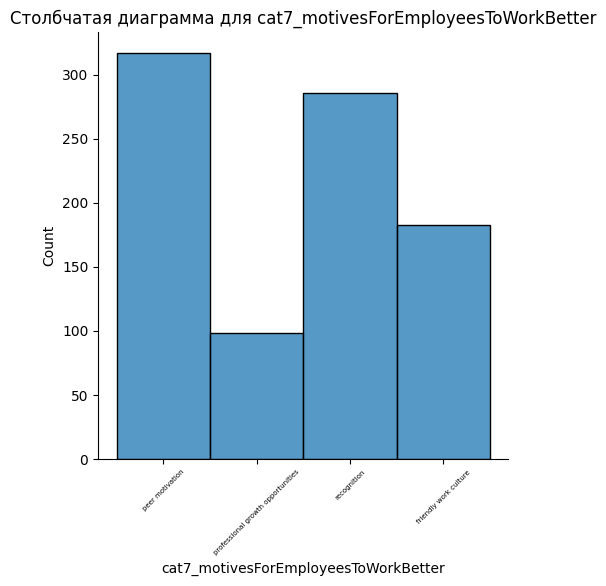

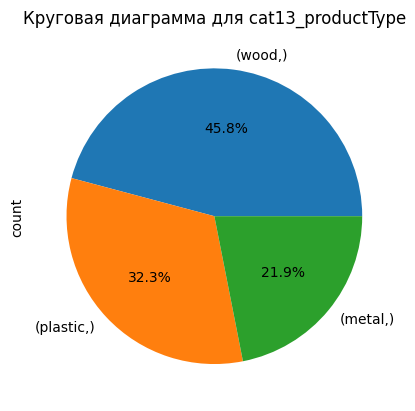

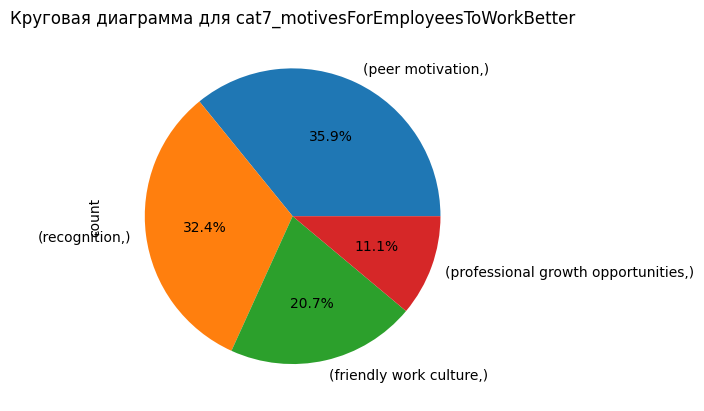

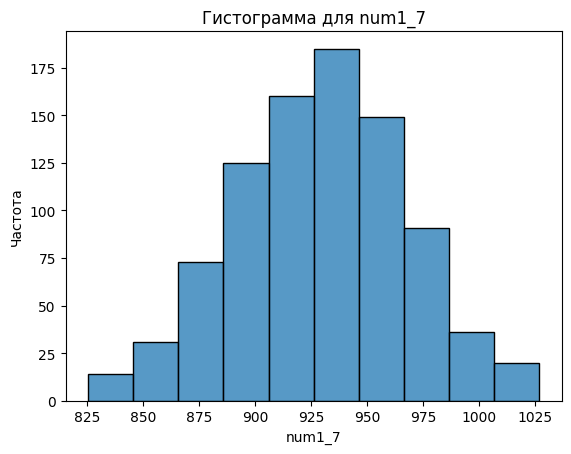

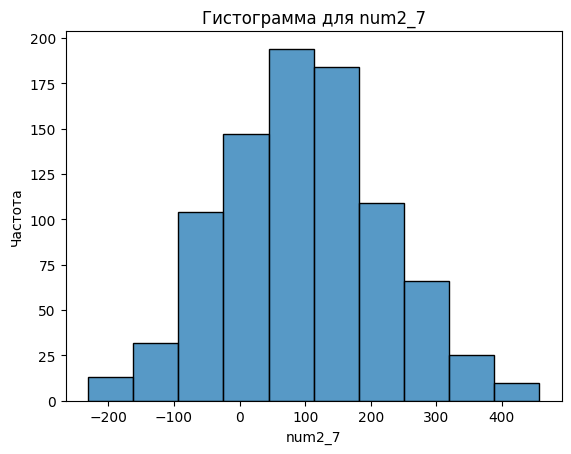

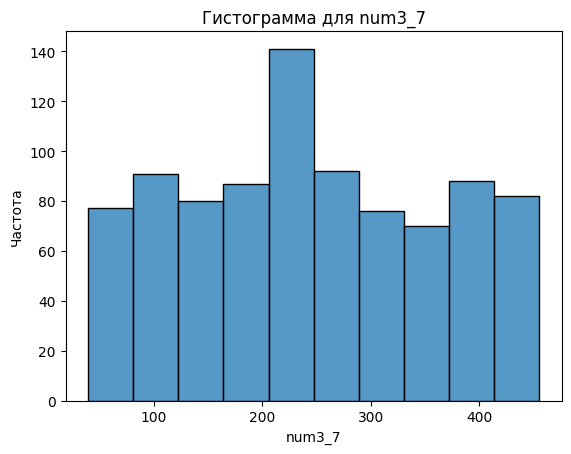

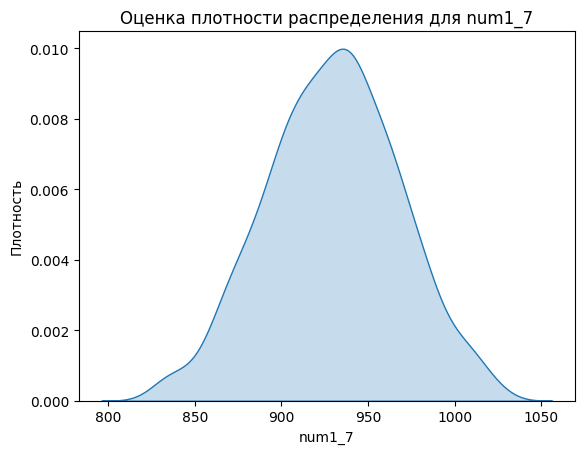

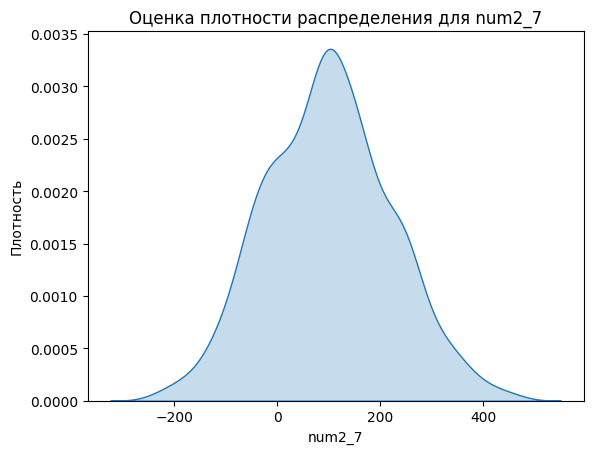

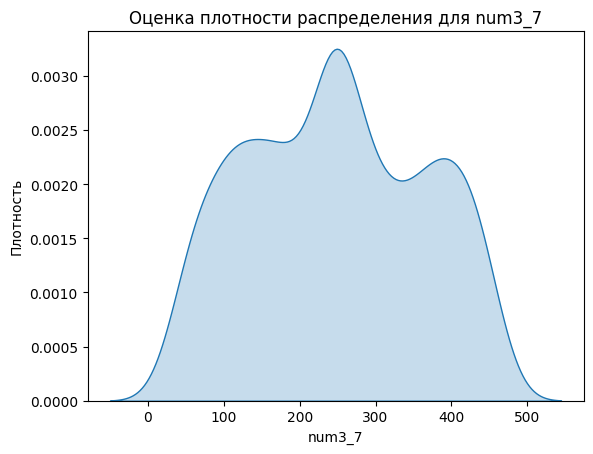

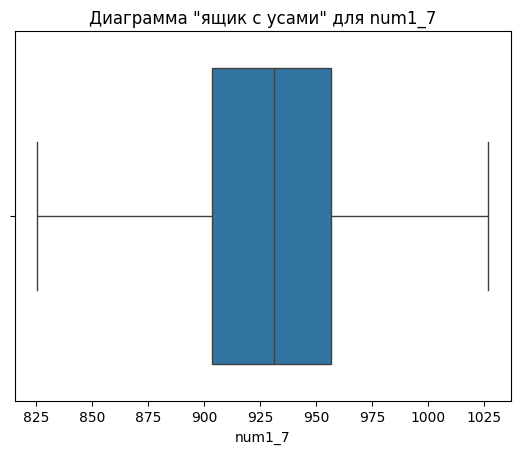

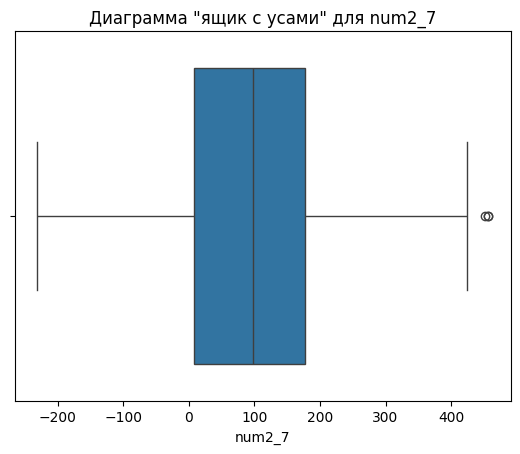

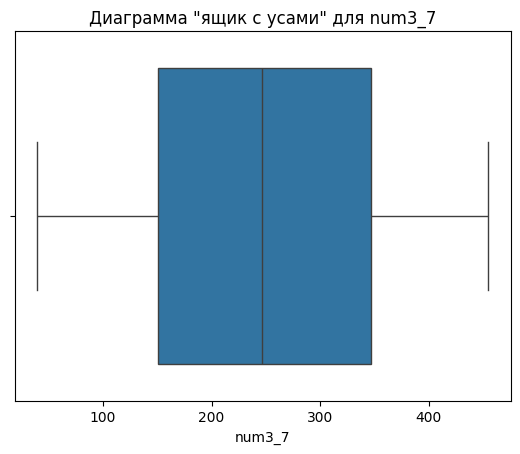

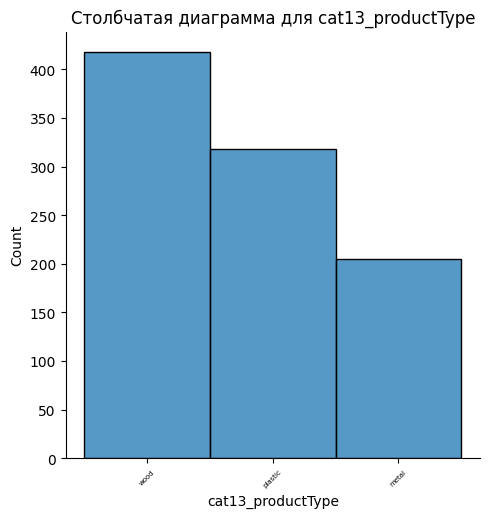

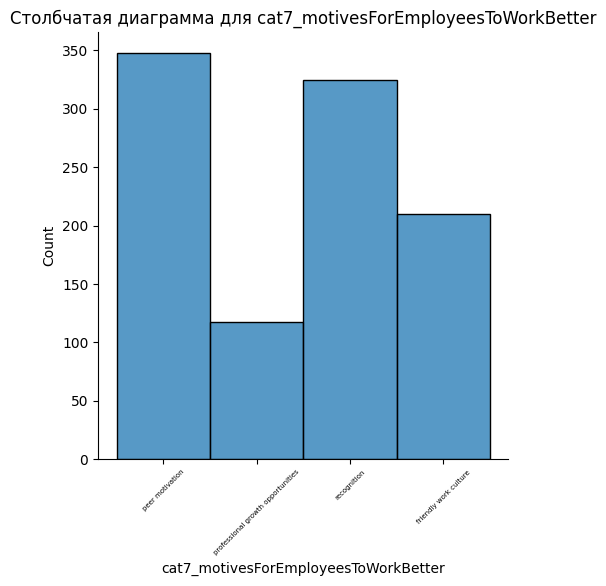

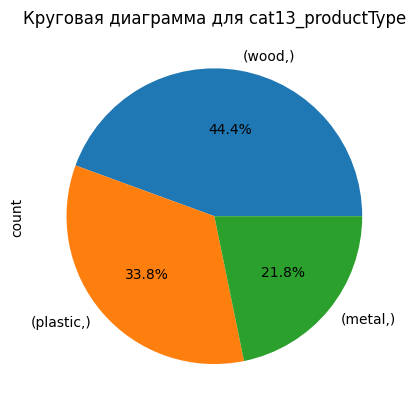

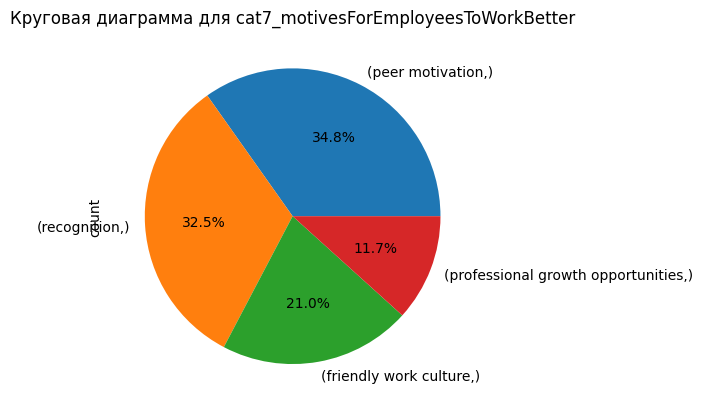

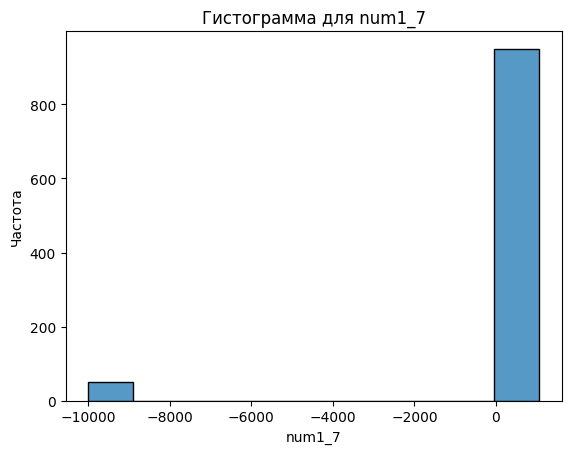

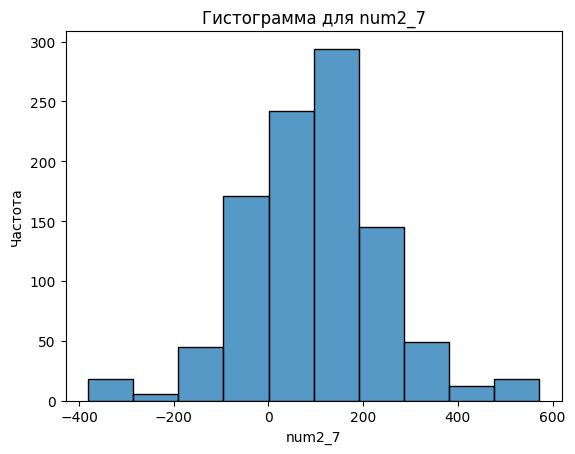

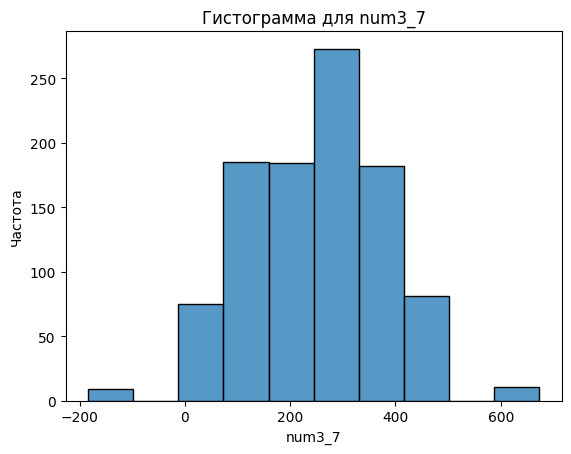

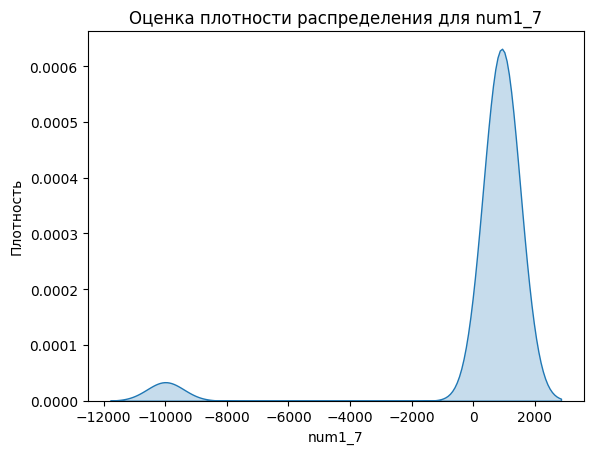

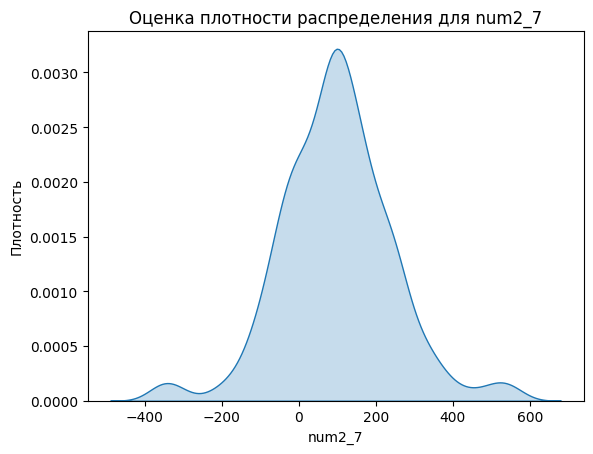

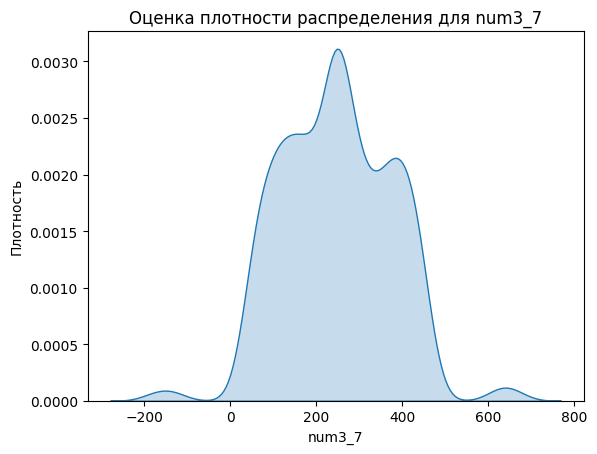

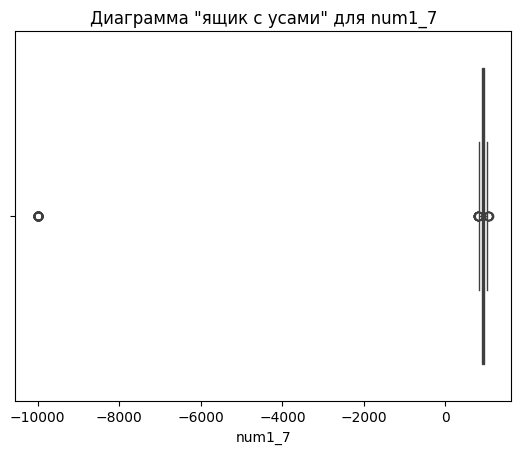

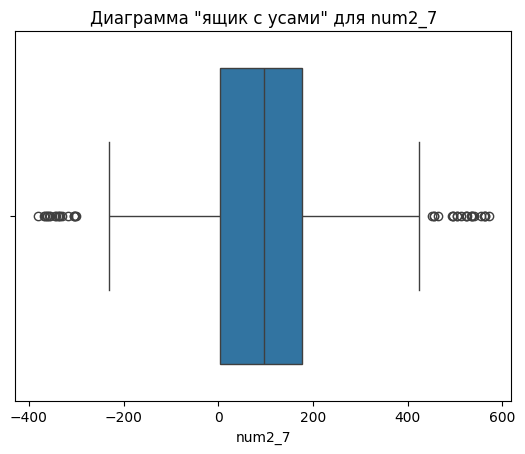

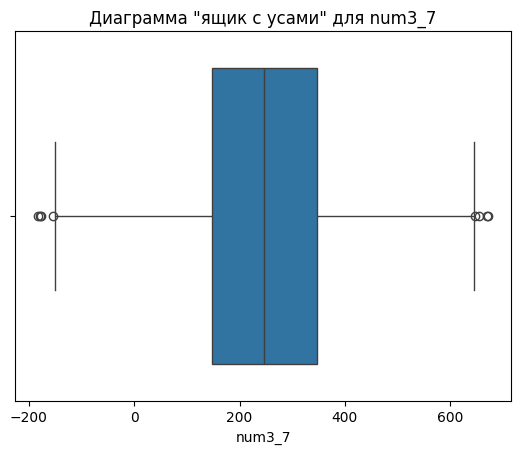

In [167]:
calls_all_diagrams(data3)
calls_all_diagrams(data4)

In [168]:
# Заменим пропуски во втором столбце самым популярным значением 
data4['cat13_productType'] = data4['cat13_productType'].fillna(data4['cat13_productType'].mode()[0])
info_table(data4)

data3['cat13_productType'] = data3['cat13_productType'].fillna(data3['cat13_productType'].mode()[0])
info_table(data3)

Количество строк и столбцов: (1000, 5).

В таблице содержатся следующие столбцы: ['cat7_motivesForEmployeesToWorkBetter', 'cat13_productType', 'num1_7', 'num2_7', 'num3_7'].

Для всей таблицы:

Количество строк, в которых содержится хоть одно значение nan: 0. Процент от общего количества: 0.0

Значение '-' встречается: 0 раз. 0.0% от общего количества
Значение ' ' встречается: 0 раз. 0.0% от общего количества
Значение '-1' встречается: 0 раз. 0.0% от общего количества
Значение '-9' встречается: 0 раз. 0.0% от общего количества
Значение '0' встречается: 0 раз. 0.0% от общего количества
Значение 'nan' встречается: 0 раз. 0.0% от общего количества
Значение 'nan' встречается: 0 раз. 0.0% от общего количества

Тип данных в столбце cat7_motivesForEmployeesToWorkBetter: object.
Количество уникальных значений в столбце cat7_motivesForEmployeesToWorkBetter: (4,)
Первые двадцать уникальных значений в столбце cat7_motivesForEmployeesToWorkBetter: ['peer motivation' 'professional growth opportunit

In [169]:
# Заполним пустые значения для четвертого столбца медианой
data4['num2_7'] = data4['num2_7'].fillna(data4['num2_7'].median())
info_table(data4)

Количество строк и столбцов: (1000, 5).

В таблице содержатся следующие столбцы: ['cat7_motivesForEmployeesToWorkBetter', 'cat13_productType', 'num1_7', 'num2_7', 'num3_7'].

Для всей таблицы:

Количество строк, в которых содержится хоть одно значение nan: 0. Процент от общего количества: 0.0

Значение '-' встречается: 0 раз. 0.0% от общего количества
Значение ' ' встречается: 0 раз. 0.0% от общего количества
Значение '-1' встречается: 0 раз. 0.0% от общего количества
Значение '-9' встречается: 0 раз. 0.0% от общего количества
Значение '0' встречается: 0 раз. 0.0% от общего количества
Значение 'nan' встречается: 0 раз. 0.0% от общего количества
Значение 'nan' встречается: 0 раз. 0.0% от общего количества

Тип данных в столбце cat7_motivesForEmployeesToWorkBetter: object.
Количество уникальных значений в столбце cat7_motivesForEmployeesToWorkBetter: (4,)
Первые двадцать уникальных значений в столбце cat7_motivesForEmployeesToWorkBetter: ['peer motivation' 'professional growth opportunit

In [170]:
knnimpute_data = data4.copy()

# Закодируем категориальные столбый
decoder_for_data3_1 = perform_change(knnimpute_data['cat7_motivesForEmployeesToWorkBetter'])
decoder_for_data4_2 = perform_change(knnimpute_data['cat13_productType'])

knn = KNNImputer(n_neighbors=5, weights='distance')

scaler = StandardScaler()

knnimpute_data = scaler.fit_transform(knnimpute_data) # стандартизируем

knnimpute_data_imputed_temp = knn.fit_transform(knnimpute_data) # заполняем

knnimpute_data = scaler.inverse_transform(knnimpute_data_imputed_temp)

knnimpute_data = pd.DataFrame(knnimpute_data)

data4['num3_7'] = knnimpute_data[4].values

info_table(data4)

Количество строк и столбцов: (1000, 5).

В таблице содержатся следующие столбцы: ['cat7_motivesForEmployeesToWorkBetter', 'cat13_productType', 'num1_7', 'num2_7', 'num3_7'].

Для всей таблицы:

Количество строк, в которых содержится хоть одно значение nan: 0. Процент от общего количества: 0.0

Значение '-' встречается: 0 раз. 0.0% от общего количества
Значение ' ' встречается: 0 раз. 0.0% от общего количества
Значение '-1' встречается: 0 раз. 0.0% от общего количества
Значение '-9' встречается: 0 раз. 0.0% от общего количества
Значение '0' встречается: 0 раз. 0.0% от общего количества
Значение 'nan' встречается: 0 раз. 0.0% от общего количества
Значение 'nan' встречается: 0 раз. 0.0% от общего количества

Тип данных в столбце cat7_motivesForEmployeesToWorkBetter: object.
Количество уникальных значений в столбце cat7_motivesForEmployeesToWorkBetter: (4,)
Первые двадцать уникальных значений в столбце cat7_motivesForEmployeesToWorkBetter: ['peer motivation' 'professional growth opportunit

In [171]:
info_table(data3)

Количество строк и столбцов: (884, 5).

В таблице содержатся следующие столбцы: ['cat7_motivesForEmployeesToWorkBetter', 'cat13_productType', 'num1_7', 'num2_7', 'num3_7'].

Для всей таблицы:

Количество строк, в которых содержится хоть одно значение nan: 0. Процент от общего количества: 0.0

Значение '-' встречается: 0 раз. 0.0% от общего количества
Значение ' ' встречается: 0 раз. 0.0% от общего количества
Значение '-1' встречается: 0 раз. 0.0% от общего количества
Значение '-9' встречается: 0 раз. 0.0% от общего количества
Значение '0' встречается: 0 раз. 0.0% от общего количества
Значение 'nan' встречается: 0 раз. 0.0% от общего количества
Значение 'nan' встречается: 0 раз. 0.0% от общего количества

Тип данных в столбце cat7_motivesForEmployeesToWorkBetter: object.
Количество уникальных значений в столбце cat7_motivesForEmployeesToWorkBetter: (4,)
Первые двадцать уникальных значений в столбце cat7_motivesForEmployeesToWorkBetter: ['peer motivation' 'professional growth opportuniti

## Задание 5. Преобразование данных.
Привести числовые признаки к стандартному виду. Для 
категориальных признаков выполнить их кодировку. Примечание 
для количественных переменных выполняем стандартизацию и
нормализацию, для качественных переменных – one-hot encod ng
(для первого) и label encoding (для второго). Для преобразов ния
использовать готовую реализацию sklearn.preprocesing.

In [172]:
data5 = data3.copy()
data5_4 = data3.copy()

Выполним кодировку для первого столбца с помощью one-hot encoding

In [173]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

encoded_data = ohe.fit_transform(data5[['cat7_motivesForEmployeesToWorkBetter']])

encoded_df = pd.DataFrame(encoded_data.toarray(), columns=ohe.get_feature_names_out(['cat7_motivesForEmployeesToWorkBetter']))

data5.reset_index(drop=True, inplace=True)

data5 = pd.concat([data5, encoded_df], axis=1)

data5.drop(['cat7_motivesForEmployeesToWorkBetter'], axis=1, inplace=True)


In [174]:
data5

,cat13_productType,num1_7,num2_7,num3_7,cat7_motivesForEmployeesToWorkBetter_friendly work culture,cat7_motivesForEmployeesToWorkBetter_peer motivation,cat7_motivesForEmployeesToWorkBetter_professional growth opportunities,cat7_motivesForEmployeesToWorkBetter_recognition
0,wood,928.003264,230.711895,63.103060,0.0,1.0,0.0,0.0
1,plastic,942.683617,-54.555626,246.529441,0.0,0.0,1.0,0.0
2,wood,986.827992,159.587517,100.871834,0.0,1.0,0.0,0.0
3,plastic,940.824645,451.728967,174.606950,0.0,0.0,0.0,1.0
4,metal,908.794236,186.329695,425.314903,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
879,wood,935.758683,-59.478491,205.060280,0.0,1.0,0.0,0.0
880,wood,924.223222,112.173751,105.832769,0.0,1.0,0.0,0.0
881,metal,903.939907,151.651724,246.529441,1.0,0.0,0.0,0.0
882,wood,874.669893,256.342389,123.257186,0.0,0.0,0.0,1.0


Закодируем второй столбец с помощью LabelEncoding

In [175]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data5['cat13_productType'] = label_encoder.fit_transform(data5['cat13_productType'])

In [176]:
data5

,cat13_productType,num1_7,num2_7,num3_7,cat7_motivesForEmployeesToWorkBetter_friendly work culture,cat7_motivesForEmployeesToWorkBetter_peer motivation,cat7_motivesForEmployeesToWorkBetter_professional growth opportunities,cat7_motivesForEmployeesToWorkBetter_recognition
0,2,928.003264,230.711895,63.103060,0.0,1.0,0.0,0.0
1,1,942.683617,-54.555626,246.529441,0.0,0.0,1.0,0.0
2,2,986.827992,159.587517,100.871834,0.0,1.0,0.0,0.0
3,1,940.824645,451.728967,174.606950,0.0,0.0,0.0,1.0
4,0,908.794236,186.329695,425.314903,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
879,2,935.758683,-59.478491,205.060280,0.0,1.0,0.0,0.0
880,2,924.223222,112.173751,105.832769,0.0,1.0,0.0,0.0
881,0,903.939907,151.651724,246.529441,1.0,0.0,0.0,0.0
882,2,874.669893,256.342389,123.257186,0.0,0.0,0.0,1.0


In [177]:
def diagnostic_plots(values):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    values.hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(values, dist="norm", plot=plt)
    plt.show()

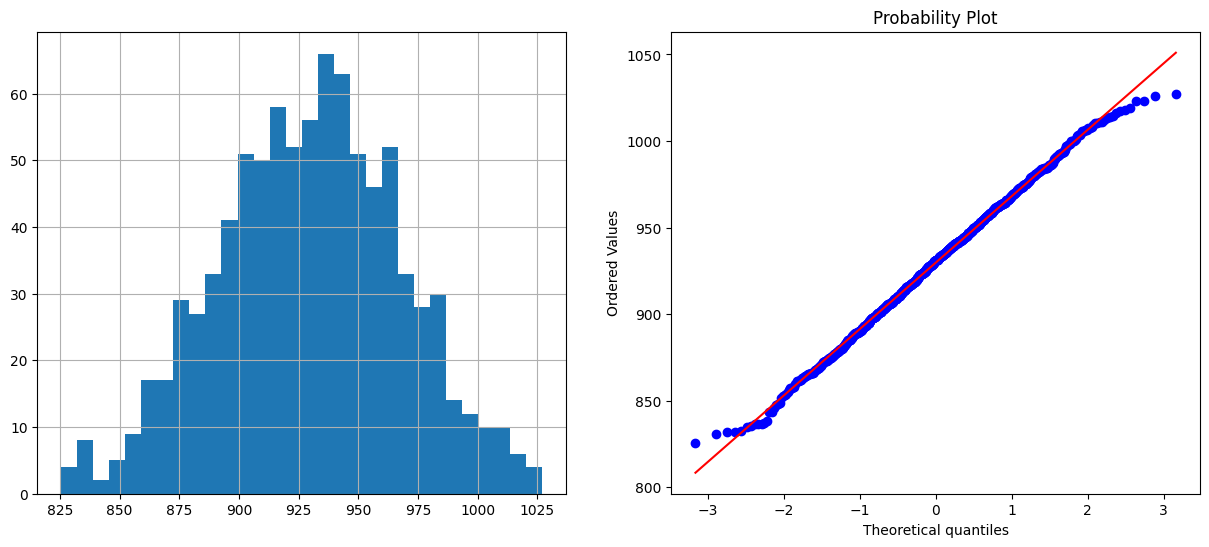

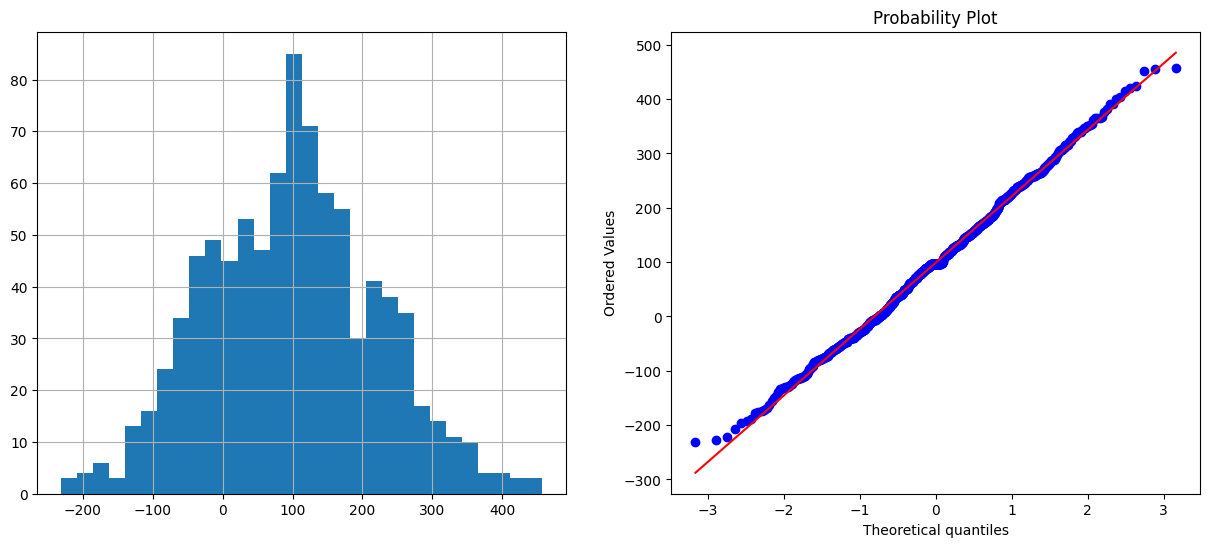

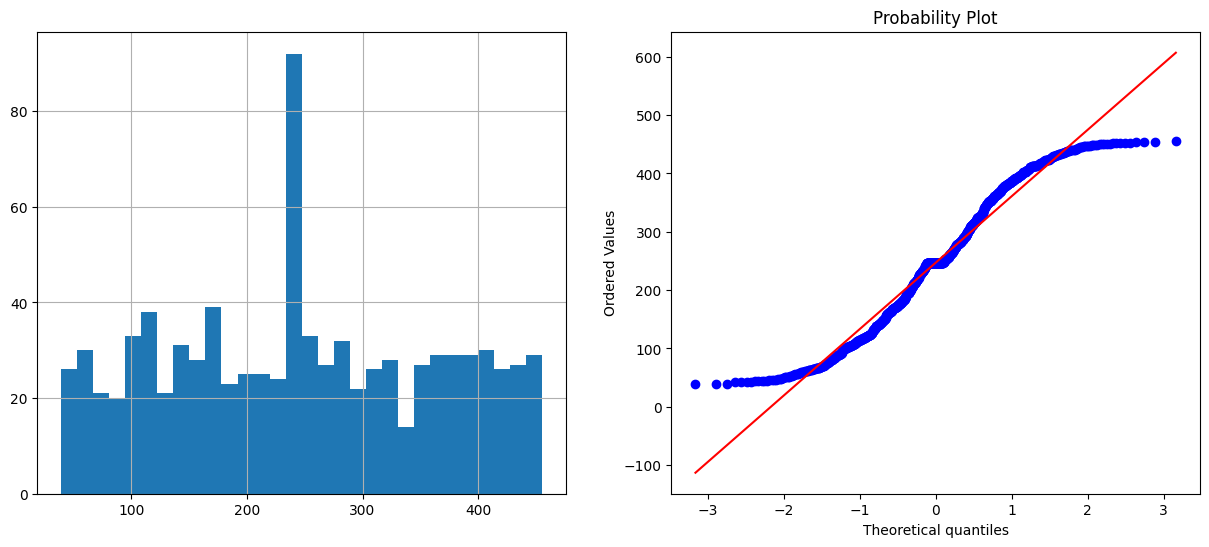

In [178]:
diagnostic_plots(data5['num1_7'])
diagnostic_plots(data5['num2_7'])
diagnostic_plots(data5['num3_7'])

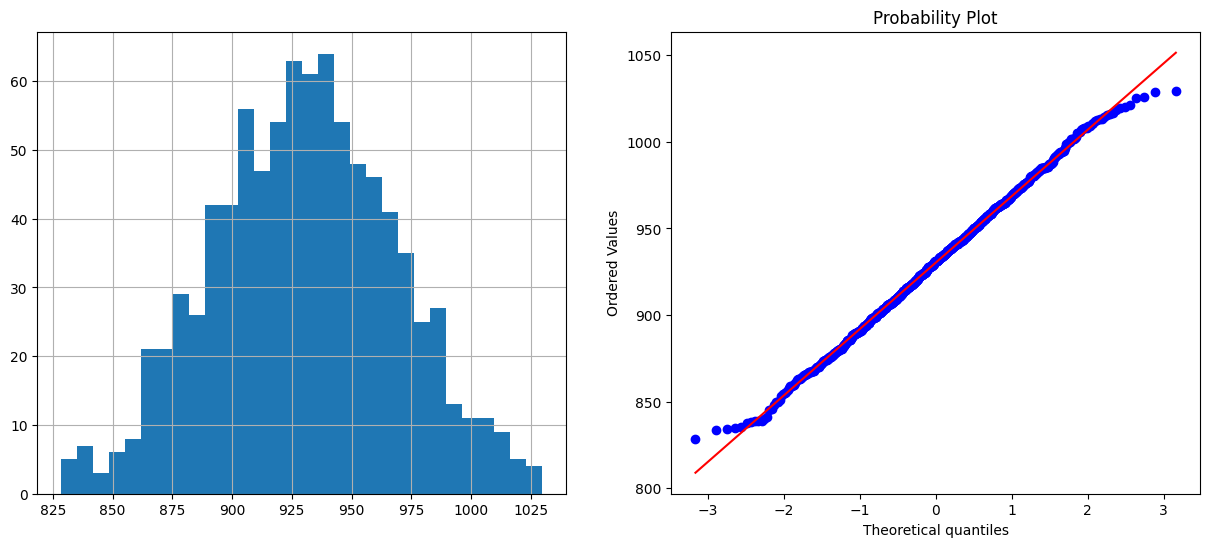

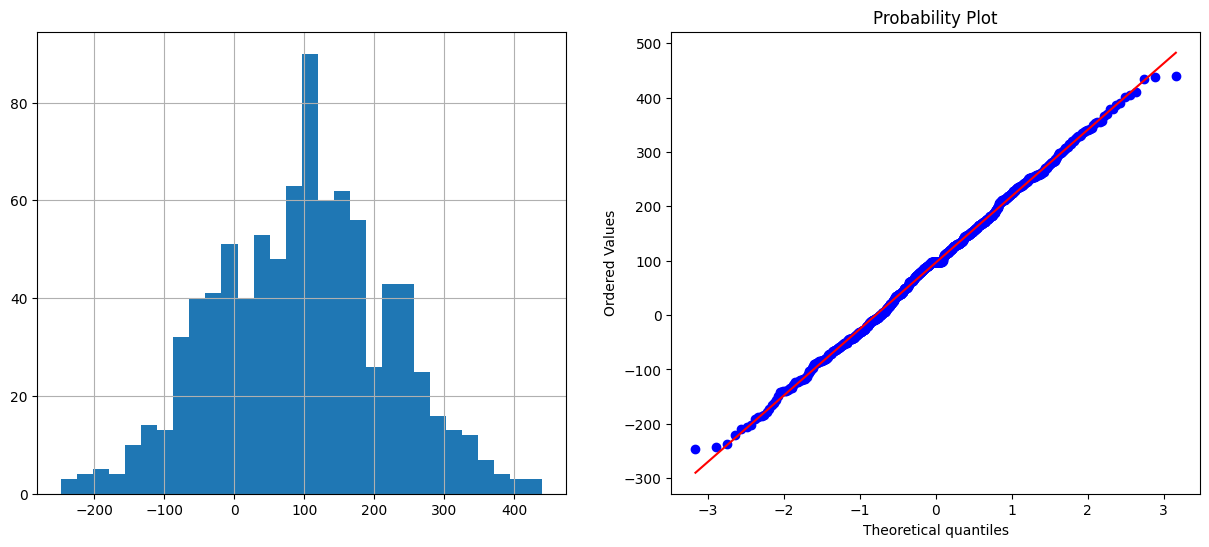

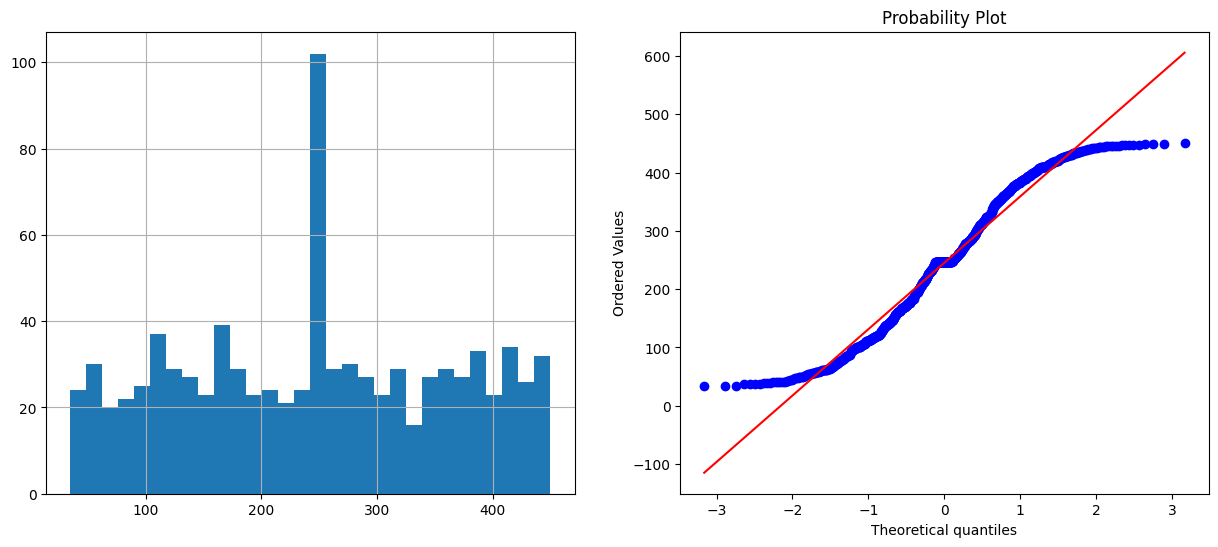

In [179]:
# Нормализуем и стандартизируем колонки с количественным параметром

columns_to_scale = ['num1_7', 'num2_7', 'num3_7']
data5_st = data5[columns_to_scale]
data5_scaled = scaler.fit_transform(data5_st)
data5[columns_to_scale] = data5_scaled

for i in columns_to_scale:
    data5[i], param = stats.yeojohnson(data5[i]) 
    
data5[columns_to_scale] = scaler.inverse_transform(data5[columns_to_scale])

diagnostic_plots(data5['num1_7'])
diagnostic_plots(data5['num2_7'])
diagnostic_plots(data5['num3_7'])